# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [3]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [4]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

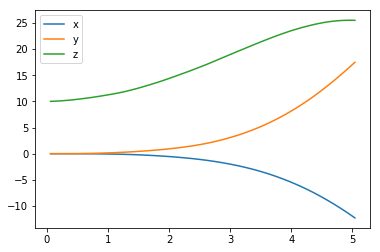

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

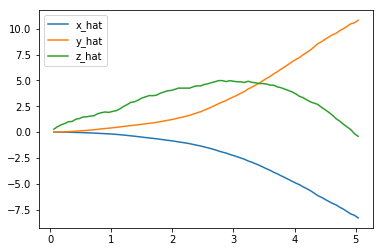

In [6]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

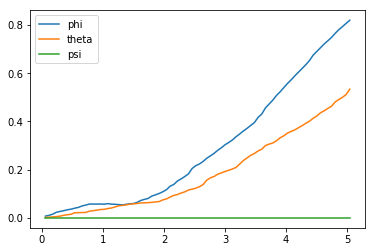

In [7]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

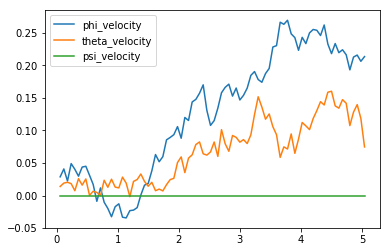

In [8]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

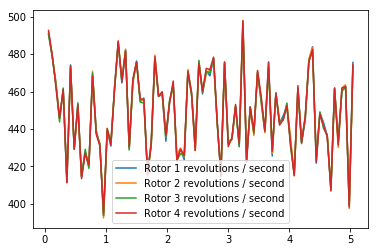

In [9]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [10]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-12.28341805  17.48908989  25.50592575   0.81967567   0.53384065
   0.        ]
[-8.28954808 10.81139602 -0.40455097]
[0.2134602  0.07471003 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [54]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        print(action)
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

[-498.42895903  -13.55596432 -910.39843148  -51.11384216]
[-419.32064916  343.95674154 -938.9779487   248.38148543]
[-467.75275892  223.57601709 -932.74683643  137.21151128]
[-472.2843155   163.93064505 -960.84400578  132.26034308]
[-556.89292034  348.63144689 -842.31109002  137.15738819]
[ -411.28592921   210.01316151 -1004.28973398   297.44277933]
[-376.61683291  197.60363344 -982.74793902  351.16851376]
[-522.04426019  422.44611093 -823.58960169  221.5496288 ]
[ -374.85104427    99.46573289 -1005.25839293   148.55571343]
[ -273.66128504    99.90547489 -1032.15684842   217.25165626]
[-428.19697243  354.34761989 -842.78958416  168.54100887]
[-262.36571263  271.05653724 -912.74888895  370.38373344]
[-402.71022933  292.3385934  -807.45864999   62.39080035]
[-431.1786629   321.65826414 -740.06331867  100.79448525]
[-338.63166689  412.68294507 -728.69453918  261.64750808]
[-388.4372548   322.04262398 -677.90998686  140.58928721]
[-262.53930165  319.16440467 -698.29290463  287.02542635]
[-

Episode =    6, score =  -1.906 (best =  -0.431), noise_scale = 0.4[-493.29174148  -21.2602988  -914.39309441  -60.91578174]
[ -264.35061061   246.72017488 -1102.76673107   410.61820559]
[-418.69293973  291.05079999 -956.166559    272.48571179]
[ -418.50002782    48.41594196 -1037.77916012   134.55891737]
[ -295.40289866   221.98442924 -1050.48734493   350.03823203]
[-410.36847287  105.79681279 -920.54188171  125.45589464]
[-328.68854039   79.98723318 -967.09057586  162.03730137]
[-410.57653705   66.51056058 -894.86427856   42.30023968]
[-248.62672155  196.52838853 -945.87638917  211.17632267]
[-240.21067148   98.47234265 -896.53266821  379.6409598 ]
[-313.85687286  188.61563028 -816.07450773  151.06100197]
[-365.33329682  307.52021007 -719.13157043  152.18684187]
[-316.50461403  247.01015562 -671.85324035  205.41989463]
[-288.04161285  230.11024044 -646.8715474   178.58994454]
[-185.34543842  185.74736472 -666.83958126  215.46919364]
[ -66.89575067  218.00751895 -684.97653835  296.099

Episode =   12, score =  -1.404 (best =  -0.431), noise_scale = 3.2[-525.46388572  -84.09248918 -903.49119969  -98.86777663]
[-469.17261593  232.28842338 -935.81282664  167.26245653]
[ -305.44869161   163.62289449 -1052.28044572   352.40362394]
[-456.20296018   15.13189844 -944.47257002  103.3359875 ]
[ -369.9070181    214.0673652  -1012.97017341   261.35301229]
[-441.60094696  181.23259414 -957.19077443  129.78641087]
[-397.36135963   23.4526416  -925.19414874  267.16648626]
[-325.74429896  139.32095624 -938.79032176  346.68144125]
[-491.62662913  245.70030276 -774.90834119   42.35806157]
[-348.27102906  199.06885355 -843.42609598  297.00749046]
[-353.16524442  249.51024787 -794.24372547  267.22123357]
[-204.49109801   91.85847678 -868.94436572  279.30811181]
[-368.43126318  134.12625469 -699.42155088  113.11632852]
[-254.45362943  187.41333115 -706.80573829  353.47801959]
[-332.45175247  298.02043417 -574.29502595  249.51898394]
[-285.13401785  101.7277432  -521.49843041  140.2440929

Episode =   18, score =  -1.243 (best =  -0.431), noise_scale = 3.2[-500.77920316  -93.68075442 -970.43433105  -88.06812456]
[ -239.51670053   129.14260879 -1109.12580082   358.10505069]
[ -356.45211321    40.00421031 -1036.65774616   194.52869584]
[ -351.99407901    74.55129732 -1039.83442617   180.59107867]
[-437.01433044  127.87486314 -957.26782309   -8.2614585 ]
[ -415.23422989  -163.94707236 -1033.51769778    62.45632581]
[-456.31939766   79.08526438 -928.94057816  135.15117715]
[-325.59039553   88.68159807 -992.8867147   191.22559445]
[-354.7933647     3.75790253 -950.24515312  117.07813544]
[-350.66153827    3.39216216 -912.49130399  110.11825141]
[-281.25006339   32.12149028 -915.41682152  165.58349364]
[-366.11681959  -67.03292108 -837.05404258   35.79813507]
[-252.43897788   -2.60663511 -832.68367     190.80961997]
[-279.57890863   14.77819027 -756.23650082  181.18030012]
[-212.25692668  109.63837501 -726.53794996  267.77220774]
[-320.27235503   79.59332012 -554.09206137   69

Episode =   24, score =  -0.514 (best =  -0.431), noise_scale = 3.2[-527.86459201  -15.40049561 -960.07339583   17.06842691]
[-485.6599386   398.27375905 -976.84142191  318.88699457]
[-446.18651112  468.01549518 -957.40242133  432.09973235]
[-553.1676077   362.18936077 -884.51978647  224.07972789]
[-575.3154445   220.31662755 -876.58572446  124.39907181]
[ -283.15618524   177.07414044 -1100.60012671   467.04350952]
[-480.87470166  215.56694394 -860.02167939  218.61302546]
[-513.0679467   382.85491061 -790.71923568  294.64093249]
[-269.59462271  368.16362288 -990.8156793   518.48417879]
[-418.42604238  224.05968279 -869.70628306  128.37436246]
[-325.89240441  273.98890917 -867.93751647  419.8132196 ]
[-474.97228499  316.31828501 -736.59108904  152.70490522]
[-249.69711664  153.52855032 -862.6269052   366.11694842]
[-329.93276917  332.27174116 -730.21887025  275.39173566]
[-286.52644432  398.73068299 -738.9109845   390.0163541 ]
[-232.02924177  458.17668674 -618.81741244  418.3870785 ]
[

Episode =   30, score =  -1.124 (best =  -0.431), noise_scale = 3.2[-642.84522895    2.9341392  -939.10141872  -67.37014213]
[-720.85848963  243.58819884 -884.65338949   32.05563919]
[ -495.21922804   128.02714777 -1055.68713236   284.70865057]
[ -514.919715     131.93000995 -1013.87320963   182.58898439]
[ -494.03463962   264.56072121 -1025.71700863   238.57155266]
[-667.33288462  313.77682562 -912.27154504  139.3551621 ]
[-514.37892021  378.96067978 -953.4837867   406.06624801]
[-625.05746234  246.59535577 -866.0254697   189.95619588]
[-505.88997248  220.14938115 -892.51511973  197.58113716]
[-509.01424367  261.42385609 -852.67030611  165.69176875]
[-473.0712578   313.12507658 -824.19638519  225.24918082]
[-448.29568535  257.32848156 -821.69087028  283.91170603]
[-387.57720304  127.7925341  -793.77937682  226.51929769]
[-380.21991451  380.43831761 -707.49076976  248.82522532]
[-262.56080246  500.91022612 -731.03929967  359.06446124]
[-238.1834773   471.64703048 -696.96808857  404.631

Episode =   36, score =  -1.416 (best =  -0.431), noise_scale = 3.2[-520.11486989   35.25686386 -904.5963631   -87.68294382]
[-501.50885732  396.42268035 -879.65961521  205.09020324]
[ -407.64507802   168.05445717 -1011.60977455    79.91190363]
[ -382.64895394   232.55306437 -1011.22910691   207.15189524]
[-477.32158773  316.55840493 -927.56875234  152.94513899]
[ -357.27150671   170.21631493 -1015.05708078   127.8355696 ]
[-410.85415695  347.88261441 -887.84078822  236.1518993 ]
[-428.41954244  110.44408007 -920.90290374   53.01065743]
[-382.97674542  259.86074714 -846.54801098  268.07639556]
[-303.03940919  275.19300648 -959.79744355  286.77030754]
[-503.95320169  279.44983346 -690.34321285  -10.68492638]
[-456.18889146  273.4620489  -699.23385088  122.86724864]
[-294.42623295  454.12720607 -664.44531255  334.66535622]
[-260.43848774  333.22050798 -679.96798907  269.72843941]
[-395.63348564  120.22756878 -580.29345148   22.70277325]
[-249.08728259  251.61534683 -586.98621293  208.916

[-221.06615732  406.01317817 -662.01164545  447.32612244]
[-283.77930593  300.99500571 -572.10803324  256.70203387]
[-201.12877604  249.40471891 -552.00505459  315.08402483]
[-162.44349991  207.98974834 -463.15992494  279.37587275]
[ -77.48842548  218.867366   -423.99807397  373.65100733]
[-141.29739786  407.7493569  -300.74220754  291.26781891]
[ -79.78464223  288.60865466 -285.97715195  235.04355369]
[ 112.54863166  409.62989714 -240.5692449   586.26896422]
[ 131.10712756  240.14150881 -234.3463135   354.17391062]
Episode =   42, score =  -0.519 (best =  -0.431), noise_scale = 3.2[-491.31936747  -50.25254215 -880.84112202  -84.4706792 ]
[-457.55490905  106.9183608  -936.80593824  148.72207824]
[-330.11271321  225.52836142 -995.50862934  425.77132012]
[-481.16844245  201.19880372 -852.80137638  165.76933285]
[-393.32719659  306.24043333 -908.43291818  346.81213028]
[-328.60225828  170.05076879 -984.79441287  199.2833864 ]
[-307.66228233  181.97143712 -927.53674433  305.70801816]
[-403

Episode =   48, score =  -1.348 (best =  -0.431), noise_scale = 3.2[-494.39050882  -33.48413513 -864.97892197   -9.49774748]
[ -295.61995365   221.56829262 -1003.83899441   480.52272766]
[-378.49127287  107.57886313 -967.85885867  316.33541128]
[-464.2964583    86.69856568 -931.80679536  189.12152732]
[-420.7112597    55.60921091 -880.37545535  220.95321136]
[-381.04599105  100.71243889 -890.21738904  225.57076166]
[-451.69516473   48.79802196 -864.75476703  148.21821171]
[-321.52678658   96.46472456 -822.93500637  286.609617  ]
[-356.11021138   55.02975012 -785.31711548  210.04138643]
[-321.8715629   186.48395159 -781.46686737  303.82657293]
[-315.04798581  226.20462944 -757.76900573  358.56208007]
[-290.34149294  108.32517955 -778.21900011  354.19640807]
[-267.02285616   79.7290858  -763.72266417  334.58355671]
[-262.02048685   16.55714823 -720.69301385  271.76575981]
[-235.43981468   -2.11939626 -670.54661875  260.46518855]
[-157.51972998   63.60299774 -670.47739836  373.63905727]
[

Episode =   54, score =  -1.583 (best =  -0.431), noise_scale = 3.2[-472.53491148  -64.19025543 -937.97341347 -115.01127604]
[-450.47104192  248.57240322 -925.50511255  -66.7330184 ]
[-366.42080962  193.70761297 -993.0674964   224.25792381]
[ -200.56947383   153.4816507  -1085.13670978   334.05587477]
[-376.54287023   71.51262211 -984.77668453   72.1541847 ]
[-386.12973728  120.69261708 -942.58840414   -5.06513772]
[-297.56651681  136.40846651 -987.28064318  126.99077666]
[-341.94461847  179.3730032  -926.73720394  204.64105473]
[-311.57162853  163.4519356  -928.14394328  225.75780228]
[-310.58502378  243.36400878 -869.4609617   268.9895116 ]
[-299.15034549  195.02851994 -847.20844971  263.82228505]
[-384.91346705  213.32320422 -776.39773594   29.51686835]
[-370.96196606  289.51709972 -748.39605967   53.89231337]
[-218.78219297  386.95317851 -765.09480895  395.28972812]
[-238.90126416  234.38665656 -769.47843547  158.96802007]
[-203.02244564  404.93121929 -693.89225122  320.24640805]
[

Episode =   60, score =  -1.080 (best =  -0.431), noise_scale = 3.2[-445.14934661  -33.1782303  -883.63796871   -4.29244685]
[-376.50606629  418.39249315 -898.24472333  341.469709  ]
[ -269.96602615   445.91210689 -1025.97504926   533.31659327]
[-296.0051489   173.07438512 -942.77923234  299.00614367]
[-416.93701928  325.58351085 -894.95429487  218.240393  ]
[-357.27619086  280.06491809 -948.98860854  267.59161773]
[-455.50619004  226.66942243 -798.11613824   95.85328895]
[-279.01721227  443.4639054  -902.15996576  345.76550812]
[-275.99386911  139.49467353 -903.26905239  168.76365276]
[-279.50346527  280.74836371 -896.9205369   318.67590306]
[-280.80604508  211.93839342 -882.77959533  278.23968178]
[-286.1353645   145.19739157 -870.1215214   201.89029337]
[-194.24341173   85.44084204 -870.45732542  440.2607161 ]
[-259.49397528  292.65449541 -720.84004551  268.13471547]
[-297.77675525  183.58285997 -661.96874849  217.67614752]
[-178.000781    239.51010851 -740.08775369  408.02738999]
[

Episode =   66, score =  -2.287 (best =  -0.367), noise_scale = 3.2[-420.39886978   46.53461323 -807.68557992  -73.19748796]
[-392.79850135  393.92289351 -810.76420509  212.20920883]
[-363.64685266  193.68788713 -853.36244542  111.30647852]
[-294.45438478  473.62168102 -790.60265409  330.87108934]
[-334.28805108  316.25657599 -787.75970962  223.59666179]
[-378.70305491  325.76259816 -786.84443873  132.99910271]
[-373.35157867  358.99462553 -785.53798     143.73803326]
[-254.83986789  169.49953908 -852.82747574  358.04412132]
[-292.27864556  502.84361444 -667.26021632  395.6068756 ]
[-345.81760276  322.45629181 -672.96439218  303.56189655]
[-305.26725059  265.01099001 -680.31259704  259.50352024]
[-270.79030232  338.61740878 -684.84792654  303.15863496]
[-136.5627633   211.8309928  -770.45958458  269.09994198]
[-290.69780384  352.84708998 -569.0262147   213.02025308]
[-259.26749935  239.35556051 -605.03967865  210.28130223]
[-234.57613062  235.66725746 -571.1969497   261.10639118]
[-219

Episode =   72, score =  -1.540 (best =  -0.367), noise_scale = 3.2[-390.27465652  -25.0761852  -869.98937805  -33.27331957]
[ -237.55160664   339.77160066 -1130.60904987   413.03316064]
[-379.86876318  183.47776176 -909.27571692  176.6318273 ]
[ -276.19967079   219.51052089 -1052.08948203   278.44596818]
[ -281.1467027    320.76712463 -1019.57447699   326.97559826]
[ -248.75767961   462.17241094 -1053.7692282    491.03487361]
[ -201.39458943   453.68697762 -1126.29364054   516.08889749]
[-282.51469297  336.80674019 -953.77281878  346.12829002]
[ -263.25787075   410.43870839 -1049.2856104    374.07629276]
[-230.32177141  229.99988098 -957.67050037  418.09676801]
[-337.11412118  215.42785942 -801.53989192  188.69336675]
[-257.45805899  311.07942603 -933.00015846  464.474086  ]
[-227.04080722  327.71904209 -984.93031344  433.23697115]
[ -180.83038556    31.95677593 -1017.16138091   361.59251395]
[-193.95336353   78.76044344 -990.96757411  351.07450783]
[-181.4268046    49.94040166 -901.9

Episode =   78, score =  -1.557 (best =  -0.367), noise_scale = 3.2[-370.86298161  -20.3569569  -923.18044958   17.96983617]
[-361.97223977  315.70915694 -887.18239265  219.54553987]
[ -244.16548532   188.7496586  -1026.8869954    314.30728788]
[ -248.39388936   205.82458075 -1002.22478618   339.68608704]
[ -211.69823542   232.01566936 -1001.70286556   440.33623433]
[-193.08583162  381.44668865 -975.9629754   450.84400703]
[-229.58309638  386.01105692 -867.15090216  369.95428548]
[-179.69823767  220.23076272 -945.07954668  313.84705251]
[-336.55474734  141.85828817 -812.00397553   80.83721756]
[-214.02731844  107.56021352 -912.58426738  207.42689672]
[-170.98217133  195.68920288 -897.24227865  359.30848938]
[-149.30723696  344.39626059 -790.45126882  483.17732402]
[-192.42178202  154.10422337 -687.33562113  311.1491915 ]
[-149.26228717  145.92477263 -744.01616665  254.13557168]
[-243.76654484  -89.2490174  -638.34383971   75.48510959]
[-201.04551962  209.52232656 -552.41444722  321.643

[-280.12824855  449.37853947 -748.242031    368.51458536]
[ -83.87154825  409.22104443 -821.72658088  439.15051593]
[-153.41076671  419.01101391 -729.32991866  333.28028918]
[-128.7126461   356.71491136 -701.23560756  313.7871824 ]
[-204.33287302  404.95003646 -563.06054459  304.65032694]
[-168.29287251  470.63461797 -463.74292071  426.81286772]
[-105.62374898  536.10605953 -400.11486514  463.25954236]
[-136.07614115  498.38382803 -202.02706113  334.38302926]
[-189.56374497  440.91369942 -142.0789517   261.7978399 ]
[ -16.54167091  667.34737492 -157.19146074  558.00069572]
[  16.15262068  479.30189087 -116.78755147  206.1692359 ]
[118.76561272 299.88865157 -99.4185668  268.85475811]
Episode =   84, score =  -1.880 (best =  -0.367), noise_scale = 3.2[-402.14982714  -51.92263688 -906.47084756  -40.65678166]
[-410.21187622    7.38622634 -905.61551602  -22.45696947]
[-354.72723753  173.32319037 -944.05004334  156.2902238 ]
[-488.73254276  200.34529339 -827.03866527    7.28647548]
[-289.953

Episode =   89, score =  -0.586 (best =  -0.367), noise_scale = 3.2[-430.00702973    5.87925855 -884.24696229    1.0237244 ]
[ -107.85406091   349.1512535  -1098.4076978    548.63132961]
[-347.41271958  145.53617254 -964.96245804  144.79579719]
[-301.14262582  213.34595766 -930.44689561  279.50328566]
[-350.17716531  328.69018517 -906.04889798  236.03091588]
[-360.01098412   71.18914487 -907.44905833   83.47110774]
[-290.26805181  244.16886966 -885.78913714  255.86932059]
[-204.61628398  476.64825663 -853.45200299  501.73571983]
[-284.93725672  127.21794656 -855.21355575  271.08416058]
[-108.51983649  381.50423037 -855.92167192  429.96109781]
[-270.53288802  305.6033353  -760.03411329  344.69612093]
[-186.70785106  270.23948083 -810.51602483  405.2650837 ]
[-304.13740337  138.6340999  -623.05320418   85.55221796]
[-176.91878997  234.0515751  -679.3387582   356.7780272 ]
[ -92.91110976  321.39529428 -670.1953127   365.20505776]
[-137.62555464  179.75367136 -538.0170161   261.19072096]
[

Episode =   95, score =  -0.943 (best =  -0.367), noise_scale = 3.2[-452.36184192  -78.84415462 -810.3988121     1.99879831]
[-397.80830608  307.25026911 -842.4796185   250.32536476]
[-419.21471615  120.6268508  -903.22267304  291.14123021]
[-426.20976977  334.898633   -806.45526766  371.37249735]
[-312.99532486  321.44159602 -897.58521343  459.85785544]
[-305.21969654  282.03722263 -825.67933231  434.27355097]
[-290.65678005  373.7220195  -810.83525287  501.21308193]
[-326.77322068  242.9827491  -889.16961996  469.44394898]
[-289.2043556   147.39267281 -901.10891369  329.10422942]
[-366.82127777   92.61885241 -730.56867489  158.22565072]
[-290.88249744  174.43868961 -690.17932705  236.45720087]
[-271.66330361  129.52660318 -753.75115643  328.9890914 ]
[-240.38123956  307.98802799 -711.59977187  414.14725209]
[-276.7697662   156.26050791 -736.38990024  412.85764667]
[-154.56179774  429.23154136 -716.76056327  561.24642633]
[-204.22086161   84.45589224 -575.0738451   133.60532442]
[-210

Episode =  101, score =  -0.605 (best =  -0.367), noise_scale = 3.2[-401.32210991  -34.56131171 -882.13422648  145.84002421]
[-387.8984477   323.6594599  -842.79589066  293.52855848]
[-252.36612701  355.68805912 -986.28092824  513.74275373]
[-394.81471886  282.78834564 -918.51973069  294.81219697]
[-233.62836328  294.76150834 -869.74245738  436.9165985 ]
[-258.02692317  490.92567537 -847.74731533  577.50541695]
[-266.8779885   155.90702309 -891.30037381  313.82771337]
[-311.80716789  238.35235843 -833.04180488  392.4620508 ]
[-143.83037089  418.46074896 -846.79187435  664.24040898]
[-164.22995107  328.87494565 -848.11734154  558.3082995 ]
[-241.8828068   456.0580586  -758.27549487  551.48960958]
[-337.68000585  321.70746988 -681.12640081  344.93042221]
[-247.99153165  212.77941937 -777.67585691  289.93921542]
[-257.28099259  246.7771993  -649.26788851  293.22148936]
[-166.48701583  354.52593528 -663.87122068  423.99934886]
[ -89.12260181  248.83149828 -695.13802323  346.5254392 ]
[-262

Episode =  107, score =  -1.247 (best =  -0.367), noise_scale = 3.2[-474.08599493  -51.90406073 -855.6309602    -3.70139118]
[-410.95303641  312.98873806 -803.70231764  268.06605395]
[-258.38301756  217.61808606 -986.97848095  327.03692953]
[-415.5773509   157.96286967 -966.30345225  134.89447775]
[-314.10000655  138.69967808 -937.18811863  184.10342945]
[-494.95309785  188.52484408 -773.72462775   46.16258662]
[-440.99376087  125.37819121 -893.25922056  141.13448961]
[-236.95454409  191.36111932 -990.24764624  283.36922953]
[-367.31962261  180.04396934 -828.01913499  181.54763136]
[-228.97284745  323.84908111 -845.85900261  447.56339022]
[-206.69859671  306.12905763 -819.57740314  453.40765467]
[-323.15897564  287.85427889 -727.0098894   120.13995242]
[-208.48550113  192.99527324 -758.62457112  354.59385105]
[-217.52528946  331.68941429 -675.77016702  324.67187981]
[-244.02371634  223.42739411 -588.22633077  291.42433398]
[-125.4663361   334.14217424 -655.5306781   272.94317461]
[-167

Episode =  113, score =  -1.631 (best =  -0.367), noise_scale = 3.2[-510.28285742  -71.57733203 -945.06670131  -40.20613057]
[ -491.66140446    83.15584417 -1039.69930256   110.91015608]
[-439.1318692   204.82183094 -982.67306408  193.06872709]
[ -370.95629922   149.65810048 -1052.02951203   309.88416599]
[-458.70513832  374.51955679 -928.68018922  406.50922843]
[-452.16430005  250.67077759 -950.94289371  347.41823796]
[-457.68187852  297.82691971 -898.04401923  289.67264363]
[-368.91799272  358.531116   -982.87793856  478.28150243]
[-322.54762394  259.53917078 -977.21641941  332.21830784]
[-386.09759727  286.19871365 -863.16250426  396.15701487]
[-328.92813925  280.32571026 -894.26893029  420.04939437]
[-301.41823294  145.05723342 -977.50277511  252.85599512]
[-316.03303493  236.64548264 -880.01186424  299.34815768]
[-224.27892326  256.01913658 -892.63183404  425.20656602]
[-320.14009027  117.36889117 -745.60258411  159.52627293]
[-159.60876305   80.76141311 -851.91434714  203.2081925

Episode =  119, score =  -1.509 (best =  -0.367), noise_scale = 3.2[-484.08868302   37.5228069  -850.33577326   35.02767888]
[-352.95006749  194.56175888 -961.98893814  141.11246298]
[-423.79818985  346.60487401 -934.69919434  449.55817149]
[-350.3600643   154.24913369 -978.92402259  155.76909612]
[-242.12387371  384.65840401 -968.15792807  454.15044414]
[-337.51568473  431.77642104 -924.60559081  428.3863521 ]
[-358.21943618  380.96461611 -881.45566363  216.7937905 ]
[-411.49085846  325.84398728 -843.20533046  333.531223  ]
[-252.28059479  399.27008393 -950.81668433  607.58032064]
[-228.19064099  376.38025512 -856.41748829  513.83383974]
[-240.6746628   236.19890306 -901.59668706  310.90031231]
[-252.37950256  377.85732161 -756.941238    435.29925359]
[-353.26314324  194.85476435 -764.5466184   229.18211147]
[-254.42450984   77.18284695 -731.09088683   43.00234039]
[-278.58531866  251.49155704 -693.72074875  397.31528474]
[-205.97175933  164.36611879 -644.92577409  248.6614969 ]
[-102

Episode =  125, score =  -1.956 (best =  -0.257), noise_scale = 3.2[-546.93667445 -132.9201253  -824.49426176  -47.37057447]
[-476.73021173   90.36159442 -888.34653132  267.17224395]
[ -340.09727596     3.72487072 -1003.13056278   389.02231819]
[-360.19930033  -21.12520567 -921.83715825  289.71132478]
[-372.09827362  315.39851388 -931.24072765  593.72700853]
[-458.00570774  173.55780932 -850.68417238  186.40985913]
[-401.99347851   56.75878159 -833.27094765  263.41288747]
[-263.56305634  182.20291647 -916.1674215   378.93640607]
[-238.1225166   321.58567282 -857.49697512  541.64699491]
[-378.24618355  183.93776505 -769.43303811  310.11329855]
[-440.01235717   24.71601107 -683.34542672   49.23205015]
[-294.04804843  164.84906149 -750.57556716  284.04533118]
[-296.50323414  178.39984544 -724.05272286  232.4835288 ]
[-263.08977345   91.46678057 -724.31861172  153.00969775]
[-233.91794071   14.15505251 -705.49867322   85.55549629]
[-134.05514897  456.53801407 -660.76239021  544.79535588]
[

Episode =  131, score =  -1.521 (best =  -0.257), noise_scale = 3.2[-500.62588663   -7.23620718 -864.29307453  -52.4230827 ]
[-450.70050143  293.75806483 -856.43671797  161.48911292]
[-455.67044098  472.51460297 -855.79526139  348.49200226]
[-480.07707932  231.05352497 -817.16567439  122.12339266]
[ -303.07295172   178.25345126 -1000.44890559   302.16986646]
[-376.37936843  449.42249213 -899.52302599  420.22756806]
[ -241.35583424   226.75636947 -1077.70390094   290.47876986]
[-361.81139602  395.45825707 -868.40179351  333.40935746]
[-272.01715545  408.97107351 -985.34850847  408.29409394]
[-355.59985761  639.91766203 -844.27597902  411.21674503]
[-192.49165051  289.01119659 -985.98281236  390.53172618]
[-421.75401194  230.64614722 -772.12478733   22.27237193]
[-397.53025739  562.23106752 -743.55787238  295.54378914]
[-240.58734922  224.71046766 -818.70147433  336.03881272]
[-379.5117425   213.60523826 -646.87607723  136.2971884 ]
[-245.26792574  207.15433701 -742.09865877  118.5019245

Episode =  137, score =  -1.006 (best =  -0.257), noise_scale = 3.2[-4.73745121e+02 -4.38203649e-01 -8.43455077e+02 -6.51982035e+01]
[-405.36642278  214.59835683 -920.89806381  154.41091071]
[-426.71488857  340.22139433 -858.33638406  279.93957354]
[-444.8790175   241.22580665 -878.26749877  144.55941939]
[-453.31718381  286.39687625 -865.01473987   99.75868318]
[-571.62187519  367.24698189 -725.91653411   54.93272262]
[-452.57684248  251.80526633 -816.06061265   87.57675416]
[-342.70851303  257.32290457 -886.72558554  321.90088013]
[-367.52787077  434.77984916 -796.93702882  374.91460286]
[-295.07572091  391.32517446 -819.19104774  462.02722602]
[-284.20902584  405.63180348 -743.85429665  439.01569876]
[-324.70167889  439.87276257 -688.76420783  340.32824066]
[-299.56349002  179.7189437  -647.33242898  206.9749302 ]
[-315.70503679  361.8095332  -598.88140403  271.5976447 ]
[-178.22151521  332.27322848 -645.04730354  234.98800511]
[-307.45282567  243.37296147 -544.53310425  174.9665760

Episode =  143, score =  -0.307 (best =  -0.257), noise_scale = 3.2[-562.28648636  -10.61963832 -879.58096098  -14.98910159]
[ -336.73406656   343.28325193 -1012.97873766   483.04935633]
[-509.20528638  326.2441903  -871.53328501  231.93892842]
[-537.27255269  429.95281669 -788.50046851  255.36755897]
[-455.61720788  533.40299855 -834.20046108  408.05607428]
[-411.78522744  385.30955589 -833.507556    377.69528359]
[-427.64601708  296.93944349 -813.47190291  297.04310125]
[-335.79552142  246.46214162 -902.27737687  270.4989473 ]
[-447.14032091  279.52589909 -690.05850596  245.29534256]
[-344.51603872  296.66889759 -811.86992817  413.9066767 ]
[-275.44866569  557.35142337 -747.20422069  526.223371  ]
[-436.68868232  355.78285451 -558.90673918  216.18623553]
[-264.43031634  166.96679813 -705.46373622  359.17435782]
[-244.47606723  448.57437021 -552.8272126   408.30505015]
[-132.73536975  313.18870427 -610.67163483  459.97445582]
[ -21.20390626  393.90590194 -627.70639277  590.22935948]
[

Episode =  149, score =  -1.240 (best =  -0.257), noise_scale = 3.2[-607.55228972  -88.04239226 -851.31178421  -76.11291396]
[-605.48116194  131.09028278 -936.51019587   96.94862907]
[-508.75855128  221.25248418 -944.18083541  261.16011812]
[ -403.66060813    93.18836806 -1016.5212153    264.53923373]
[-520.23382101  135.51299956 -862.01974684  208.14536423]
[-452.23505414  153.26232209 -951.93328955  307.6564671 ]
[-521.26179242    6.66224919 -924.60827809  100.80592697]
[-398.6484395   193.6674607  -929.93175185  299.48857309]
[-359.35713286  269.34082706 -973.50360461  450.1822863 ]
[-273.44900649  256.20369552 -934.18046006  450.41361569]
[-347.62241226  229.60630213 -865.19535191  400.68994714]
[-474.76490674   70.07784928 -798.33637444   57.20460233]
[-410.14375425  453.35299243 -701.98392168  449.85786557]
[-336.04907243  324.56411648 -674.69212703  358.8081758 ]
[-428.91845741   33.62735371 -650.5675402   128.59491073]
[-184.52303516  118.96881514 -775.78610541  306.76490231]
[

Episode =  155, score =  -1.200 (best =  -0.257), noise_scale = 3.2[-553.93032011  -32.77643085 -902.43279343    8.04030189]
[-481.8854174   378.41923932 -969.25291508  457.99868069]
[ -379.33397707   190.78472507 -1002.31787312   405.2171215 ]
[-494.55864324  279.45052557 -994.68008272  303.06070915]
[ -345.17160278   248.49613465 -1105.42721455   479.46566581]
[-544.73113017  130.77160937 -851.59397476   99.19960843]
[-427.3921514   284.04889811 -970.91809274  403.94247234]
[-427.7986502   307.28434017 -939.07659485  373.31290111]
[-437.44008142  271.23883782 -903.81320623  326.36015607]
[-416.42207927  322.79812345 -876.1664592   379.911582  ]
[-474.29331427  341.50869754 -827.55633354  237.64368096]
[-429.31577552  171.10155511 -861.69075328  188.7966832 ]
[-410.5025124   405.64530919 -851.69833842  356.17257827]
[-220.81924517  382.28662454 -972.36088924  512.02488974]
[-392.25973327  413.6673502  -710.69318886  315.8748803 ]
[-187.52647282  483.50804884 -839.91199503  694.8751778

Episode =  160, score =  -1.123 (best =  -0.257), noise_scale = 3.2[-502.67721295 -113.07911599 -870.50614641  -98.1331573 ]
[-351.50551599  207.8586239  -991.00266323  136.48824791]
[ -267.70098491    81.65113162 -1044.76817249   318.43764737]
[-400.97039342  308.62492312 -946.73684653  291.66681762]
[-417.66911754  157.79692898 -916.77332372  107.24784604]
[-431.96902506   57.29813363 -914.33033002   72.70202973]
[-374.26728828    9.61458099 -971.56672769  113.70371726]
[-298.36420342   93.55149543 -959.12853334  221.05934142]
[-371.02552667  257.44038299 -847.81267236  265.68214504]
[-323.70346712  127.25018621 -887.24150655  227.17428737]
[-547.81258008   89.12300602 -751.30164794  -41.41365823]
[-387.70109929  401.71573244 -777.84005352  305.68461927]
[-399.00097734  153.48695751 -729.53283868   71.5851691 ]
[-319.1020415   153.05436199 -773.29652876  147.85912802]
[-282.81553796  137.73117137 -775.4784741   134.67914026]
[-272.63139498   74.61931603 -773.83140214   59.40646829]
[

[  42.5849369   352.96816595 -340.73555471  281.87944796]
[ -20.71192961  131.20898064 -106.84285332  261.9850769 ]
Episode =  166, score =  -0.965 (best =  -0.257), noise_scale = 3.2[-550.66606811 -120.62504872 -890.0604548  -127.62812666]
[ -375.5537725    128.77915588 -1101.67841631   265.98908637]
[-427.59319485  248.29301763 -963.52064849  178.07574038]
[ -256.79613917   174.70938719 -1159.38717882   441.25664774]
[-598.83964054  323.55377308 -796.45709012  107.73053571]
[ -395.50921667   289.67249618 -1031.27196167   294.90086872]
[ -364.09733851   358.11172502 -1061.76585171   205.00263025]
[-546.56087252  139.26169442 -873.94942924    5.99299696]
[-408.4218053    46.83903894 -997.80272409  167.60145883]
[-326.84399405  107.04229083 -979.03445316  300.65284284]
[-329.41174466  158.03213539 -936.60560716  160.77302344]
[-366.22709884   11.48695615 -892.24180026  226.81568055]
[-350.6583351   160.32026683 -829.90154832  248.99882019]
[-370.83722428   46.33193573 -793.16409419    5

[ -27.91832982  103.34905977 -299.13987768  164.25747407]
[  -6.37026708  167.00765285 -220.75872911  173.93094773]
[  99.54645286  429.52061745 -150.41283779  468.32768288]
Episode =  172, score =  -0.507 (best =  -0.257), noise_scale = 3.2[-514.79075826  -55.02159555 -838.83918396  -37.63953273]
[-468.16078426  267.63558537 -806.6569057   182.29892066]
[-383.13938604   -5.23273235 -913.29195879   23.93436744]
[-418.53877635  333.88200625 -827.50543835  323.03952084]
[-468.73392555   25.68732437 -818.16062541   69.31119914]
[-300.18154855  151.14820762 -935.68774846  264.50279869]
[-332.48475366  352.93736433 -847.2612423   407.27038964]
[-256.0066203   275.44045725 -893.32911213  401.03755138]
[-219.25138912  303.52990711 -886.69038248  327.39991469]
[-276.66201529  397.13039509 -807.58736552  390.45158865]
[-427.0831569   449.48237229 -610.8884574   284.05228301]
[-133.03221719  249.58302245 -917.60217601  519.55603703]
[-269.20495405  163.61406814 -676.3254568   166.40853175]
[-228

Episode =  178, score =  -0.311 (best =  -0.257), noise_scale = 3.2[-561.96252208 -127.42351547 -923.69545551 -105.77205387]
[ -472.79767075    62.97465402 -1001.61512156    73.54010498]
[-482.19996082  127.83165961 -922.28209015   52.04480094]
[ -330.89816618   233.0972661  -1054.59922765   228.98484749]
[ -358.52172169    54.00345452 -1075.30402715   138.01210989]
[-373.42242775  342.03208678 -916.19515339  338.68289991]
[-291.58238039  109.78200618 -969.72196727  253.49772788]
[-378.77841056  295.4757964  -832.87496964  283.54258062]
[-409.40811841  310.07958003 -829.74457892   88.83282953]
[-335.22146525  -14.01101748 -939.13136493   58.22354918]
[-375.02098147  118.73886073 -785.39538273   94.61183608]
[-394.63783287  164.82429415 -695.51122506  124.18268058]
[-210.19953799  139.6064737  -853.84440792  268.01229818]
[-245.756637    285.53219503 -729.13285159  271.85692068]
[-187.83109678   88.73691058 -688.62777115  195.69366875]
[-304.02240636   96.66468216 -515.89518015  155.566

[-97.21106594 366.92491936 -59.27150993 180.18447426]
[  4.40564033 424.59993121 -60.91186537 260.5227221 ]
Episode =  184, score =  -0.915 (best =  -0.257), noise_scale = 3.2[-598.28838057   21.20357126 -837.01186269  -32.83759701]
[-411.44204561  349.26017441 -958.44839623  405.96353616]
[-462.68509521  279.02823128 -915.81438949  236.94294558]
[-629.98658008  456.73630749 -782.33321347  189.82286823]
[-463.28170891  497.75810827 -886.59017885  419.12419585]
[-600.14869762  183.61536662 -818.10700519   47.14352591]
[-413.11815923  265.14845493 -884.27742462  165.96126674]
[-434.88805896  293.66168239 -824.99046149  287.02526692]
[-463.03116885  404.95702122 -733.86466704  347.45328851]
[-467.92863081  368.63524943 -736.8073203   283.35861987]
[-392.27718607  306.0035168  -767.42939407  197.21436626]
[-334.82707306  525.19795954 -727.99164853  363.64937789]
[-367.36757415  541.27197488 -650.61326619  280.89869595]
[-287.35565716  381.45870245 -671.07113479  211.22172145]
[-314.7919542

Episode =  190, score =  -1.034 (best =  -0.257), noise_scale = 3.2[-544.07987974  -83.86353249 -894.25778127  -35.44470755]
[ -335.25362368    71.91060314 -1016.02255725   328.31249024]
[-506.20038851   59.42546719 -905.27553243   80.47508654]
[-472.72351799  231.95970447 -981.38094899  202.76897824]
[-420.64373238   41.62731469 -942.96304739  138.63427215]
[ -365.65377872   149.9515782  -1051.37591756   286.20717927]
[-452.18099971   32.53120538 -934.04693889   96.25907893]
[ -316.56474773    73.34341428 -1055.46937279   191.60412125]
[-322.27354683  149.82737976 -989.97758767  365.08957538]
[-380.64421206  274.96842845 -927.45528386  286.66369277]
[-234.57068026  126.43169531 -962.02591558  410.27475041]
[-430.7703238   -86.03165475 -845.25170989   -1.57150878]
[-364.32965607  200.44168938 -765.42984378  329.40563838]
[-301.46060574  247.24141905 -748.11658619  370.07998081]
[-266.10011719  158.03371106 -728.9476868   336.47614292]
[-310.44055411   49.95220201 -714.06434804   47.681

Episode =  196, score =  -0.660 (best =  -0.257), noise_scale = 3.2[-641.11732626 -100.04993274 -778.54044817  -71.35511794]
[-529.79268994   84.90011932 -880.68931611  219.89698484]
[-673.88262731  227.71565951 -767.77299256   10.22488754]
[-574.9047464   111.95390494 -801.23180815  312.11713038]
[-468.53597208  262.16628301 -904.78135511  239.41182853]
[-548.26967624  168.53693107 -857.58398756  128.23206614]
[-523.90796674  294.51392715 -816.94286596  307.62070076]
[-486.74865681  244.6762431  -847.3934776   368.27624581]
[-402.6164456   448.53437639 -863.60456567  507.36354261]
[-477.97868686  304.44517595 -708.54857346  407.51141797]
[-427.63920855  100.50032617 -761.38273215  263.35699494]
[-272.35383186  176.00644982 -764.18354156  367.37589   ]
[-451.67044359   76.35032767 -638.51405763  129.83662726]
[-274.99205996  286.47517928 -642.7024972   367.0265702 ]
[-277.87387041  312.26219023 -578.48575434  401.99687239]
[-226.240253    271.55607832 -528.09522341  439.95374025]
[-316

Episode =  202, score =  -0.850 (best =  -0.257), noise_scale = 3.2[-492.29212359 -188.79717377 -912.752828     62.65694965]
[-463.79702819   74.81905396 -925.33064169  322.82201247]
[ -203.07283373    17.28342896 -1091.23685835   565.9912855 ]
[-387.68753124  132.41275952 -910.24171222  420.73090544]
[ -293.64932764   110.70179533 -1010.20477185   488.87972046]
[-429.39722342  159.89281507 -880.17568589  345.09258236]
[-481.32135007  187.53702442 -831.22600356  370.4478478 ]
[-463.96537182  327.02475252 -779.5204365   523.32238048]
[-316.12412011   -5.55635616 -952.19567717  328.32371099]
[-289.92807264  -17.37993073 -930.82741822  311.93034909]
[-256.13012543  200.90290302 -860.94226383  528.50954485]
[-386.15193271  387.71174955 -678.08483527  471.72312831]
[-240.82246689  -42.3324142  -767.99020792  366.95943583]
[-260.81755988  390.64387516 -606.9120446   637.21355409]
[-309.55839621  111.42145433 -653.62683842  270.34203555]
[ -72.15771506  -33.62326292 -751.23327516  403.3556967

Episode =  208, score =  -0.164 (best =  -0.164), noise_scale = 1.6[-563.88957925  -16.60983746 -858.79458603  -16.51663137]
[-488.14915247  170.64582603 -921.88692911  146.10017609]
[-537.89452866  128.7171027  -912.15979748  114.86809688]
[-346.07676411  215.49854783 -991.32412213  260.37053377]
[-554.11206645  198.54736553 -770.87535331  112.85331566]
[-426.28861384  330.06027326 -919.60074148  307.17319163]
[-445.90181587  211.70740952 -868.7990472   195.26738444]
[-461.84440121  353.36106687 -769.0634248   355.04983366]
[-312.19515464  520.08626434 -855.91863423  487.49163136]
[-356.26749261  186.0888387  -839.53719818  287.56382986]
[-404.89263906  217.59299573 -745.52374911  239.33824688]
[-336.60351796  133.17134577 -776.95820114  265.97329464]
[-341.11176249  185.85691215 -693.7375753   195.26137437]
[-227.23965581  300.39711251 -707.78088332  384.89166527]
[-191.05130215  416.68894011 -624.98896124  438.08865636]
[-192.0460318   238.0346042  -601.50422273  258.830409  ]
[-261

Episode =  214, score =  -2.083 (best =  -0.164), noise_scale = 3.2[-546.54459966   -4.72602872 -722.95076573  -79.27957762]
[-455.77182346  348.49720131 -710.89994022  113.01815371]
[-354.25063439  349.13363197 -780.49329691  390.36100003]
[-311.02330776  245.82405159 -885.19385359  287.19369381]
[-214.71830217  406.61971296 -879.76900261  415.58257367]
[-383.09476611  312.10747262 -715.85903239  243.0951888 ]
[-177.19677631  368.53379174 -837.0540919   509.2639598 ]
[-463.75080409   65.07252948 -669.03388489    7.39784178]
[-330.15633327  145.14646115 -736.11948765  361.27418068]
[-373.54441897   68.18384863 -688.91555627  101.37065949]
[-381.57884723   89.11174971 -664.55290343  -30.15317798]
[-327.16898377  305.00258677 -568.5665383   249.94434235]
[-216.24884729  344.36156314 -612.58079931  355.1458697 ]
[-232.45781824  291.51047742 -530.34343992  376.49920346]
[-157.20313901   50.79478794 -672.45942715  166.88033559]
[-174.95514211  332.83096932 -437.56032367  251.89972597]
[-104

Episode =  220, score =  -0.699 (best =  -0.164), noise_scale = 3.2[-589.16134865  -37.56965584 -896.12696215  -58.45814723]
[ -427.42836348   214.09075194 -1104.12841255   213.74305084]
[-525.50846998  238.45428424 -951.00622134  197.31467677]
[ -494.10560599   315.54214828 -1026.65695434   223.05285227]
[ -490.47782407    89.62536949 -1011.66431518   125.47280662]
[-584.22807341  317.79064517 -864.10015858   43.29004186]
[ -334.73267207   504.06676708 -1063.31566076   505.84915515]
[-396.75524441  151.68780759 -986.81017481  260.0035981 ]
[-432.46808606   30.79864569 -927.80615728  101.96279339]
[-415.46504466  223.67617124 -894.49104985  292.42638722]
[-337.22495195  348.96658127 -950.47287851  206.42729988]
[-378.80487019  427.28084402 -748.92754558  409.25487248]
[-345.85406615  150.61751769 -783.93972415  117.04907204]
[-338.42629302  184.73636907 -716.21909653  252.06307539]
[-294.93362887  289.00905163 -716.85672866  184.60438936]
[-270.92485912  155.05798208 -681.36715241  195

Episode =  226, score =  -0.648 (best =  -0.164), noise_scale = 3.2[-626.51631813  -55.20331895 -896.82567898  -44.62769852]
[-556.9029292   297.49257949 -969.26540562  311.88565981]
[-440.25517115  357.99529806 -954.52848806  423.91678939]
[-537.84502952  161.17653824 -959.21197929  139.67322478]
[ -391.79180788   226.38159361 -1022.67325578   376.88731408]
[ -370.26840912   222.68878569 -1104.64933132   406.122353  ]
[ -414.92141307   302.27259335 -1009.94201602   419.79915086]
[-483.95560078  157.79977966 -925.74277275  309.2951578 ]
[-457.44752226  139.13397646 -932.35134247  177.9506748 ]
[-470.35806738  -13.51932453 -888.0301774    98.16022109]
[-477.69324061    7.79791511 -823.97758583  110.13777319]
[-416.94366669  175.16862393 -808.60982087  275.24923521]
[-428.77119081   79.28654886 -667.22800609  232.12220573]
[-301.96792351  350.35297237 -660.40213035  483.24341009]
[-338.49538537  274.64682834 -672.76890584  292.17376343]
[-287.22182532   64.52820402 -648.67365874  397.694

Episode =  232, score =  -0.227 (best =  -0.164), noise_scale = 3.2[-592.04359785   35.46189172 -872.08258474  -36.44759132]
[-608.12357813  386.20615647 -795.4307732   219.67854324]
[-600.7233766   270.14671488 -839.32650999  124.77315665]
[-607.8872569   212.05783965 -856.73814487   32.27656037]
[-423.10077892  439.4567196  -932.26886305  277.77926209]
[-585.1636794   370.50408751 -803.06883104  180.80990188]
[-506.514148    240.29597038 -858.5348831   174.14632531]
[-254.54631654  404.00731131 -990.37351338  353.72564996]
[-412.44676414  239.44427428 -876.76659532  109.04778174]
[-453.99203539  175.60820739 -806.63087657   79.15891879]
[-443.03477259  385.57783864 -772.31420178  190.7827524 ]
[-220.84029497  483.12874952 -805.69496274  516.16736315]
[-200.84017236  356.11196064 -828.34366158  315.73545172]
[-210.03624908  396.43162569 -742.63477915  307.34021837]
[-119.38152252  302.98913628 -717.56055905  291.06711866]
[-216.88438756  617.57736465 -527.64905027  488.95781028]
[-213

Episode =  238, score =  -1.818 (best =  -0.164), noise_scale = 3.2[-558.59411979   48.85881618 -909.62040847  -87.18367021]
[ -356.62942003   247.40557585 -1137.45863549   258.36263471]
[ -408.72881412   366.53832496 -1106.9108604    225.82685098]
[ -323.25617339   472.32231573 -1129.16801809   291.36496074]
[-412.24548008  415.47512577 -975.10560401  174.73668563]
[-388.81237892  348.72135841 -999.83872767  131.59636225]
[ -424.1083049    256.55052244 -1013.81776152   214.57656103]
[-273.54867086  411.59505523 -995.09621543  315.710909  ]
[-421.01757574  231.66676019 -855.63419404  133.82836024]
[-437.5865527    31.95127287 -876.12384072  -49.97574511]
[-378.26485061  356.2369832  -797.56132293  208.8043174 ]
[-274.76583444  228.53301261 -948.36020963  110.02707157]
[-220.35054774  354.3512314  -863.73191791  155.62729664]
[-199.97479064  302.53779912 -844.45727968  251.04177543]
[-230.20856475  131.83957397 -665.54833907   40.23343922]
[-295.70868779  106.86111331 -550.60642787   55

Episode =  244, score =  -0.315 (best =  -0.164), noise_scale = 3.2[-557.31538934  -14.76174928 -938.16990406  -56.51238686]
[-521.73671041  226.14141249 -937.52683339   -7.19731844]
[-434.31828092  206.19734955 -937.71557362  194.59132057]
[ -347.23417308   100.71877593 -1141.45223703   164.24953993]
[-355.44495258  466.84310349 -933.85919357  386.52620687]
[ -301.09521386   225.85509508 -1109.64308911   207.20154639]
[-381.83942726  363.21165465 -905.72058273  307.76423887]
[-335.3455276   283.54253962 -964.54790905  289.00508746]
[-366.86445023  225.71954585 -933.83549186  166.83512298]
[-363.21150722  263.95690839 -951.34058134  297.52588443]
[-185.27539763  561.84246862 -940.43678306  501.76454015]
[-111.47639678  364.07862472 -977.73201134  416.91233909]
[-113.18899601  439.59434268 -851.48200732  519.24714044]
[-199.44676872  263.01236009 -852.44600599  385.94084948]
[-204.29653038  442.64758991 -682.33371143  400.8716441 ]
[-389.18495722  201.46478436 -645.7750075   123.7531445

Episode =  250, score =  -1.512 (best =  -0.164), noise_scale = 3.2[-638.73443716   30.89103729 -863.56158729 -144.17179629]
[ -407.35004765   269.59250625 -1083.00678845   183.42306407]
[ -380.39670269   201.68458446 -1093.18250727   232.26763245]
[-604.73413115  314.4494269  -845.15381791   72.55051762]
[ -366.44160164   407.65135494 -1048.12672921   320.06134045]
[-512.00541913  324.89592156 -899.54000777   88.11911758]
[-395.7137479   281.77384653 -982.51314943  168.73516162]
[-565.61391345  159.18161363 -794.26957368   41.8296044 ]
[-380.48890811  269.27781667 -953.91387487  205.31371665]
[-389.53459639  404.20716714 -884.13419313  281.02602188]
[-380.47722147  259.53229076 -879.51194752  158.40881508]
[-429.268738    146.96876958 -814.47376357   28.9216417 ]
[-293.29297158  493.95916118 -784.28332188  486.5234339 ]
[-353.46518127  285.55854914 -679.17460519  215.79642858]
[-327.18903599  310.02869289 -649.99055258  141.74422233]
[-258.18400739  273.88903218 -628.31050207  167.963

[-118.74221246 -133.70858393 -425.63633121  149.56095892]
[ 254.27799419  -68.65726292 -660.36717602  329.94149123]
[ 112.46809837  109.21045915 -230.6801582   343.75569585]
[  96.00032362  -39.50403714 -237.84131389  129.57367222]
Episode =  256, score =  -2.814 (best =  -0.164), noise_scale = 3.2[-567.01817553   77.04475825 -884.71874754 -131.13914842]
[-383.87459207  290.113352   -998.04381147  133.09335548]
[-528.67733502  380.28992971 -876.38384004  192.45030118]
[ -344.99842872   437.705311   -1000.01020653   373.66391203]
[-380.11748334  345.5238794  -953.51484953  299.62944544]
[-458.59917893  343.52763218 -854.15951808  211.52203952]
[-430.52516795  422.28504421 -861.22057941  353.12275452]
[-345.46309974  389.05211155 -888.17174241  304.42230434]
[-254.77963768  283.8015132  -971.04266706  255.31709257]
[-382.39517375  307.99620853 -824.75137711  140.86942028]
[-307.16446196  423.17196967 -827.55944114  362.27054919]
[-183.50292086  378.73670583 -873.26995341  478.2443992 ]
[

Episode =  261, score =  -1.692 (best =  -0.164), noise_scale = 3.2[-540.1122109   -13.62870835 -857.82303038   -2.34478794]
[-553.52637293  367.00005715 -723.96760802  191.18684587]
[ -244.39781523   162.65449657 -1073.82990692   284.70764218]
[-449.05068811  184.80081337 -864.94643902  154.44207878]
[-220.67617205  395.28210204 -992.65497225  538.47758507]
[-225.88844477  452.69744298 -938.60134972  465.61477054]
[-232.27509948  428.73521409 -954.92790382  413.66813371]
[-290.8679529   309.27544329 -910.90321891  328.17135544]
[-323.75847867  166.26973989 -840.30173845  304.3993004 ]
[-358.6933474   351.37623502 -721.62278962  235.50856996]
[-205.77886374  200.09815749 -872.25114391  224.88764863]
[-187.98164522  242.18054877 -784.62636744  339.11759405]
[-127.35766695  222.92956906 -791.5529509   448.71966783]
[-237.37478778  283.06499667 -573.91438875  328.88194584]
[-259.5338737   268.18764734 -508.55044394  167.56770214]
[-138.65863734  211.94389436 -534.05566055  316.63062403]
[

Episode =  267, score =  -2.353 (best =  -0.164), noise_scale = 3.2[-572.52995063  -18.56951975 -974.63713679  -77.32605681]
[ -403.50428206   147.25800982 -1163.0405814     55.54221021]
[-533.52287925  302.09669003 -974.80376018   97.82205416]
[ -320.64868262   292.83858908 -1124.45726824   380.37188696]
[ -388.9381207    329.63877187 -1025.44010206   342.11371011]
[ -443.12791157   265.40705335 -1009.41700734   190.56664322]
[ -401.68588527   256.25847203 -1056.84480087   195.27324056]
[-477.37041226  214.26525241 -969.00251447  153.07732835]
[ -265.01634228   318.87469153 -1068.18614821   330.93833368]
[ -305.74959672   252.96260623 -1033.16867568   146.71256134]
[-410.16293564  196.82696998 -917.7862053   268.36680696]
[-380.89965618  376.26317719 -799.30157068  287.42135647]
[-303.10911336  415.7193389  -788.37155975  312.92300133]
[-131.95102739  300.45646831 -894.44067211  381.83699974]
[-107.36172919  285.01194887 -921.49357865  242.68650528]
[-323.29630332  152.94696757 -649.9

Episode =  273, score =  -1.476 (best =  -0.164), noise_scale = 3.2[-609.41212898  -17.31780458 -907.01867707 -108.66955076]
[ -381.33825393   339.45767187 -1038.20496397   309.75020001]
[ -497.15236365   125.25847618 -1014.44139958    22.17642822]
[-466.31320357  290.09843295 -921.88872097  272.14162226]
[ -348.42385835   166.64525506 -1054.78369051   200.07818159]
[-524.56474423  165.95339968 -884.49265997  159.23311842]
[ -356.40887993   103.77534951 -1037.96924608   124.70315509]
[-632.2224276   362.82222302 -751.42474578  191.64646488]
[-430.78749966  232.85002906 -899.64385857  229.56028785]
[-358.97043879  328.10368008 -875.59385411  329.01041329]
[-372.80470946  106.36120466 -923.70085482   63.27169902]
[-296.14683091  271.80566027 -887.95355753  347.40963272]
[-277.3276868   455.13511229 -841.7034871   464.28717607]
[-283.32520481  290.60327021 -753.11602207  283.98096856]
[-302.70282642  339.19044385 -724.23179665  174.39869314]
[-332.58748011  250.50752423 -635.88210697  142

Episode =  279, score =  -1.513 (best =  -0.164), noise_scale = 3.2[ -579.03109699   -66.95313933 -1006.20002987    47.4200865 ]
[-649.52252648  193.75816321 -933.89151931  177.53117698]
[ -469.49917856   236.12115201 -1127.46205376   316.58995223]
[ -495.13319208   361.67011868 -1049.02639989   451.40201579]
[ -491.80656756    28.39235283 -1174.61675827   164.33514263]
[ -477.53622369   117.89646873 -1098.12827323   366.67161019]
[ -361.23031949   236.35735657 -1179.48835085   465.59542378]
[-511.7268391   355.05152643 -996.34185826  377.06367951]
[ -465.96467304   179.3301069  -1095.85438545   293.41154701]
[-457.82442443  205.51736478 -953.68583545  393.37565276]
[-450.81143276   39.08922092 -970.50884436  190.32098305]
[-488.55799892  -22.01377631 -934.18787215   95.76662439]
[-427.64232253  219.52236543 -867.16420391  409.62627566]
[-324.52796435  294.34791282 -919.82516162  430.50294304]
[-295.96084295  294.87514652 -860.50341276  475.96262249]
[-175.63793305  260.18624906 -940.2

Episode =  285, score =  -1.767 (best =  -0.164), noise_scale = 3.2[-597.01524845  -10.17655374 -963.98921307   38.37630008]
[ -433.86267465   396.72010225 -1118.89977265   314.58082694]
[ -474.84447264   300.07217299 -1131.94247569   328.02683002]
[ -400.63776588   180.7911825  -1211.78520075   274.13749464]
[ -351.53675255   306.25057058 -1141.83118282   525.17349266]
[-528.19870208  217.99164692 -987.03000041  209.64867445]
[-464.2528952   331.26052882 -970.55161669  451.79675816]
[-506.71754071  196.36577023 -959.5579392   129.96143052]
[ -373.12825699   268.79643016 -1054.79782241   347.79485774]
[ -316.89867573   132.0613543  -1065.41839955   324.3063072 ]
[-346.28837557  437.44336656 -862.51805881  530.28079005]
[ -213.22077742   261.81201384 -1040.21896255   335.42916981]
[-365.29300823  246.97294459 -771.10041712  326.29197475]
[-279.88857198  275.76019931 -763.30075042  202.57706466]
[-195.57780511  302.0559807  -806.23559977  346.45999374]
[-231.96571667  472.10913167 -636.5

Episode =  291, score =  -1.081 (best =  -0.164), noise_scale = 3.2[-504.95009883   18.52437276 -900.61140388  -65.50022303]
[-495.79212742  235.89401054 -914.79179697    9.02072266]
[ -289.11379982   233.04392997 -1016.50548817   319.66581197]
[-390.93817205  247.49859629 -911.26148765  168.35029493]
[-401.98858535  207.63462298 -981.5525515   174.42481318]
[ -215.23779596   349.58169811 -1002.81184008   318.34673647]
[-298.98212517  403.23864718 -948.97820117  326.13722786]
[-281.6309503   229.89196633 -992.17312294  249.4108858 ]
[-339.83263149  246.50727779 -871.91616565  227.54822283]
[-404.44469653  178.58049999 -860.58380888   52.91345576]
[-311.24281191  109.32177867 -903.44837112   92.18410617]
[-344.76115934  205.90615255 -799.852899    130.45337361]
[-291.13143328  263.338994   -805.52888397  165.94789002]
[-188.22421261  382.01833968 -798.85857118  371.61473186]
[-114.93702092  302.56712716 -818.4845359   318.71192175]
[-279.98253069  161.19623084 -677.4107074    42.6325328

Episode =  297, score =  -1.249 (best =  -0.164), noise_scale = 3.2[-649.34767005  -18.28452    -956.60656288  -87.20068702]
[ -472.2859675    296.4994289  -1105.02622308   328.7594768 ]
[ -539.36291378   217.50789709 -1126.8940286    169.59623243]
[ -558.15484728   468.77639465 -1025.44584195   303.50884537]
[ -527.38656302   216.55301877 -1124.59323856   132.98829642]
[-619.95106599  342.701963   -959.26760026  144.97819908]
[-552.06570727  375.79694868 -991.92737211  282.73010299]
[ -522.46896674   247.39072389 -1047.55612628   206.9516903 ]
[ -461.9915036    261.8139474  -1135.38337735   202.78114423]
[ -534.13074438   127.14172    -1115.35082345    69.44210493]
[-502.02464307  396.78468839 -991.91020866  333.85441447]
[ -515.37001386   134.4817327  -1050.08469294    90.25439903]
[-448.08826632   -4.91079683 -982.88579771    9.68326408]
[ -450.55389672    77.61366754 -1077.4067501     57.0284725 ]
[ -372.40969953   167.07513777 -1037.84465605   213.43377313]
[-381.88122296 -101.576

Episode =  303, score =  -1.881 (best =  -0.164), noise_scale = 3.2[-513.18198065   16.36400394 -890.43215763  -14.63786769]
[-451.71165409  333.25692215 -988.81989457  394.29531727]
[-508.09776447  381.23723911 -846.24007148  318.35931555]
[-463.95931077  255.32876006 -882.62002094  226.91565978]
[ -328.18478654   312.61123646 -1013.06919442   296.33721384]
[-455.03133409  424.63520442 -851.34536917  338.49945397]
[-412.10918812  490.09791473 -873.1739734   385.21215145]
[-404.77033279  193.50170297 -929.90663188  214.954566  ]
[-385.4997425   397.37875402 -778.03737895  412.82219793]
[-259.62296333  274.83524822 -917.96665847  479.04053185]
[-332.22210519  490.1675168  -721.53836964  400.75533057]
[-269.29284888  148.82773811 -822.970699    332.41848967]
[-353.73258884  387.69273727 -611.82441109  342.23327266]
[-271.99368583  351.70949745 -713.77128037  357.56201681]
[-324.39601156  372.92313676 -522.67580526  243.96249924]
[-329.6404568   357.66444197 -556.25799485  308.91479566]
[

Episode =  309, score =  -0.650 (best =  -0.164), noise_scale = 3.2[-591.47574893  -17.1331082  -942.46784631  -42.9110644 ]
[-605.88233516  277.16616501 -920.96741962  114.38314635]
[ -347.9891628    140.98958075 -1161.80434911   275.57587897]
[-436.41976248  500.646787   -959.65656573  514.93431989]
[ -435.15353093   505.54186825 -1055.22626946   495.83604139]
[-602.316904    363.16867917 -891.59218817  263.37705238]
[-562.86723923  542.94982874 -859.69155484  464.95093615]
[ -323.53306731   338.94172905 -1101.69359404   562.58781807]
[ -304.1906116    149.65922396 -1087.97793658   227.34424942]
[-509.96544157  386.02178432 -812.51426375  337.23448685]
[-463.16130925  350.02994731 -915.50876693  402.23927568]
[ -325.10089112   -44.85752588 -1077.59243425    91.20284551]
[-502.67419905  387.32633156 -744.53255664  364.7386899 ]
[-306.00828236  395.89640937 -878.1067441   482.10865608]
[-427.8532008   341.89301783 -756.06525256  303.44553384]
[-381.6844076   410.17546387 -785.89066698 

[-396.94800808  332.81673134 -969.62526883  249.02221109]
[-416.15689259  422.79888431 -880.11432741  386.27842938]
[-414.86300906  181.25507769 -927.35603213  197.66596688]
[-308.92673745  260.90988924 -950.87821492  265.53908484]
[-360.57442492  343.65842357 -787.19430769  329.06700599]
[-323.73342689  374.55020754 -810.13064299  231.6713329 ]
[-340.16015181  -16.05176198 -774.94378947   22.20378351]
[-342.31732707  309.62581931 -675.0395724   295.53798733]
[-214.24102552  254.33115558 -722.51952432  244.05080326]
[-196.94864804   75.74943766 -718.72194064  182.74650604]
[-167.4141267    90.47305243 -591.35973939  296.39453158]
[ -36.75530501  286.01043637 -563.70284196  451.81650965]
[ -45.76402912  262.80663912 -494.05922211  299.72844923]
[  -6.28148494  262.99650998 -456.71923949  405.45284945]
[  27.62850117  185.98601455 -379.27081747  172.02870512]
[  22.04760558  223.15813263 -266.85234755  250.72741286]
[ 112.44352814  161.02361457 -255.25857619  295.7872165 ]
Episode =  315

Episode =  320, score =  -1.879 (best =  -0.164), noise_scale = 3.2[-586.17342167   75.4574132  -853.59913691  -77.91929712]
[-442.91361347  441.81132516 -952.69981167  188.71529117]
[-495.99607582  418.17795938 -979.94549475  267.82197959]
[-434.49569664  337.00785774 -897.90901974  115.29512807]
[ -324.69477404   379.29490233 -1034.53786251   343.11998095]
[-418.53142991  310.01282464 -953.21434203  133.0480288 ]
[-497.99226968  274.91672669 -880.73778923   93.32218993]
[-408.84553279  276.89024934 -933.98844226  244.06492261]
[-373.86319431  409.08549622 -843.66193563  291.62874366]
[-411.68429085  317.09452952 -800.54261204  185.80363238]
[-419.47318008  387.43218859 -711.19267101  337.45268675]
[-389.26325911  363.34295889 -704.61081971  286.01140964]
[-386.65167217  369.48755612 -675.90281664  161.3753776 ]
[-381.20337408  193.07105944 -692.98420274  122.379965  ]
[-357.27283048  132.21019985 -713.20633972  144.93562532]
[-321.18421453  426.22117921 -579.77430998  479.56278148]
[

Episode =  326, score =  -2.068 (best =  -0.164), noise_scale = 3.2[-514.88031849   12.88039448 -860.75990834 -119.3394346 ]
[ -226.2974867    446.49424822 -1023.72984274   331.53240891]
[-434.61268662  163.09078569 -911.76660413   86.68058782]
[-475.48570204  174.99936303 -878.22709977   66.04722179]
[-347.77350731  418.69505265 -890.25047615  198.67451012]
[-339.35524649  580.96872807 -837.21932857  385.08701558]
[-398.07573632  391.86269905 -841.30207895  201.92581846]
[-330.36337991  374.79873314 -885.46990016  204.89457683]
[-460.01290298  232.91075148 -706.00563604   83.05204479]
[-383.54786596  168.65431172 -755.46466272   74.02777872]
[-402.82228243  266.67214923 -681.75946589   22.5671695 ]
[-435.73951224  324.28619543 -570.66051018   23.5213817 ]
[-362.75962673  197.08923949 -593.20444045   57.42070166]
[-187.75167212  334.73881484 -680.19931893  182.6926858 ]
[-262.16108778  234.78098606 -552.88324328   98.1850354 ]
[-238.74216187  354.29781635 -473.90144078  155.32351886]
[

Episode =  332, score =  -0.878 (best =  -0.164), noise_scale = 3.2[-528.93402376   26.19715243 -888.46410133 -115.6500529 ]
[-370.84756798  327.32157899 -983.16674175  196.70262521]
[-463.89460518  413.01970435 -810.84689655  232.93553079]
[-472.60621117  207.2093983  -879.19319344  100.61507216]
[-452.80659188  306.90824488 -919.5118514     8.41448191]
[-263.82022444  436.61291923 -998.94295721  317.90895804]
[-332.68351802  433.77644934 -967.90635572  294.67534735]
[-261.59097552  443.59844973 -982.0403916   299.71732758]
[ -246.88207763   315.70665901 -1029.34781763   241.96612645]
[-332.21687884  449.46798423 -823.20478197  128.98056454]
[-292.85086581  364.56916505 -855.35038538  116.01493147]
[-236.01245682  290.23456367 -935.32296609  189.92107938]
[-385.14356596  328.45078195 -679.51273151  186.07515489]
[-409.2046953   283.0395294  -702.8251644    36.49786649]
[-202.76077307  527.71120636 -657.73440282  387.64443736]
[-347.32518306  436.2703004  -528.10088585  288.26894999]
[

Episode =  338, score =  -1.260 (best =  -0.164), noise_scale = 3.2[-582.79250756   91.41603763 -970.90952795  -73.08567734]
[-675.08875105  405.90221479 -916.40981792   38.46542921]
[ -444.29904698   310.24859564 -1194.34413198   111.4824931 ]
[ -445.55520521   319.03972098 -1151.23191605    94.5614523 ]
[ -419.57718069   478.77142913 -1128.8888904    329.47812925]
[-467.46052304  483.32970205 -954.71923616  265.08526495]
[ -281.37838308   334.01916454 -1178.63343661   253.54649535]
[ -379.58386793   422.08594093 -1060.55928213   233.58459674]
[ -245.69319828   380.64505464 -1112.80448614   319.5380817 ]
[-451.89252795  376.77644188 -892.94265992   97.88816012]
[-231.67861226  538.80707007 -985.41547957  545.43568875]
[-268.05580142  229.55038899 -955.02297733  182.33664212]
[-366.62158998  387.05230836 -735.51203708  301.97336588]
[-372.54578111  363.36298821 -688.02580934  226.93801107]
[-200.55038263  525.62833607 -704.23594905  432.17727457]
[-279.62625343  237.7285817  -611.52753

Episode =  344, score =  -1.615 (best =  -0.164), noise_scale = 3.2[-466.9510137   -13.92898733 -878.96449817    3.9041622 ]
[-256.08267433  350.38478579 -998.6214997   430.93207166]
[-482.13633479  229.0702523  -809.57099525  152.47724337]
[-216.82534616  220.43272233 -995.48529909  329.5275597 ]
[-326.91384089  194.45537606 -910.93377209  287.79608176]
[-393.42981392  260.0807197  -861.80066042  262.1337064 ]
[-270.3249742   311.80538198 -970.43454204  479.26788927]
[-274.76399931  228.22049228 -952.18686038  409.40847661]
[-346.90402397  173.89700058 -846.87291619  244.21535311]
[-204.09629241  265.3886857  -902.18414158  437.2547848 ]
[-416.49945991  125.33225068 -808.67249943   37.9548759 ]
[-353.03388602  194.67870955 -798.5965577   285.74847954]
[-270.09164137  167.99152535 -774.07519568  220.11156294]
[-280.70664246  170.72891589 -710.78862881  236.36827409]
[-199.64974523  255.32477014 -690.60062876  425.73802717]
[ -90.06036189  152.12906177 -795.27743798  309.34176306]
[-155

Episode =  350, score =  -0.708 (best =  -0.164), noise_scale = 3.2[-540.26551342   38.92964838 -856.3247467  -101.43072722]
[-408.56482409  391.59704643 -910.54568267   59.67926467]
[-382.92851228  314.84149481 -992.5974954   257.69888181]
[ -343.14569834   356.58519777 -1030.90392698   196.89818643]
[ -320.15063982   395.21442948 -1048.87367028   129.07922905]
[-304.15400529  308.09142637 -961.95456236  245.50166803]
[-484.68467958  211.11633403 -789.36032053  -47.8822171 ]
[-398.44802236  369.80934222 -900.59139325  278.7834889 ]
[-245.07759486  437.43205742 -995.31558477  327.7764379 ]
[-272.05664123  232.44865221 -985.74057894  280.64863932]
[-400.47956275  110.99140804 -846.06091257   26.19823508]
[-470.70151619  106.04557555 -739.08395482    0.91426601]
[-245.78697445  213.01041943 -882.59309796  282.00342186]
[-236.98864589  324.96988635 -813.83067348  255.44269617]
[-375.5598486   134.73349779 -693.01442711   91.42071661]
[-281.30197743  246.73798223 -662.7618998   178.8982012

Episode =  356, score =  -1.121 (best =  -0.164), noise_scale = 3.2[-555.03602407   -9.90656535 -905.14120519   13.23150667]
[ -256.37151043   407.1655528  -1070.19430896   605.76466874]
[-534.44201032  276.70589962 -877.31036255  220.22391355]
[ -387.28960309   326.94703854 -1065.14651696   373.11327452]
[ -317.60948258   299.72374911 -1134.17063999   481.39259636]
[ -163.39015676   142.4918714  -1187.91768993   565.4609544 ]
[-433.66444725  181.07646044 -863.45582869  290.58054965]
[-466.10329164  241.03978214 -903.74240032  240.99030042]
[-312.11542978  310.80033739 -963.36120544  426.17695597]
[-425.5321942   328.27248708 -741.44922881  287.98094737]
[-303.13752997  370.00539694 -814.69057183  503.67662536]
[-335.8836998   434.85453476 -697.10396289  437.79709214]
[-293.24162237  235.15627929 -787.913335    397.09640963]
[-328.48508042  106.59340803 -704.57626084  163.71611403]
[-368.80721752  245.18507984 -533.78999539  159.60341112]
[-168.3577752   101.43456168 -631.43822027  339

Episode =  362, score =  -1.281 (best =  -0.164), noise_scale = 3.2[-610.96503346  -88.12131848 -957.90872148   11.93840573]
[-632.16180217  260.84465855 -819.8152161   313.44943857]
[-605.9937299   306.90766594 -848.91986846  330.69096707]
[-528.04443327  299.72521595 -934.92586271  406.92080262]
[ -462.18224571   124.34601271 -1048.2770924    392.9902669 ]
[-486.16931866  239.5763928  -991.82587679  277.44311114]
[ -342.95851698   379.24289303 -1053.85680272   492.10501966]
[ -323.13696458   296.46466435 -1002.96642207   442.52554778]
[-402.12192317  413.30544246 -918.0542948   454.85489704]
[-394.2371754   314.92653304 -922.13444049  327.8050663 ]
[-383.90980387   99.67213599 -970.6036642   167.85635158]
[-372.5711531   231.40445315 -850.00223188  150.71233938]
[-255.87460658  241.75415347 -890.47655824  383.5227601 ]
[-323.12631718  210.35955684 -757.23375339  219.50263043]
[-144.45916289  205.87800615 -878.44386607  403.22861493]
[-133.42235335  199.93369851 -711.1859696   265.084

Episode =  368, score =  -0.992 (best =  -0.164), noise_scale = 3.2[-574.45518637  -17.31526797 -930.97857981   15.95739621]
[-526.29706811  303.97519313 -966.44417262  143.17419477]
[ -540.50615377   263.94504364 -1044.03674314   242.70099773]
[-514.44409328  372.91287558 -970.83716976  340.7339987 ]
[ -286.59649073   223.88614063 -1097.09539408   447.57096748]
[-455.46300793  447.54936259 -953.60557383  517.63406672]
[-616.9712086   190.1422838  -865.97147591  135.67296603]
[-502.12995668   95.8346415  -990.06444966   84.83099566]
[-389.05154985  266.62120601 -983.98366354  286.08828278]
[-465.69555729  124.37858672 -948.22203283  391.46057651]
[ -303.10984697    75.00415699 -1062.13525591   287.02745823]
[-453.24191215  136.61814552 -923.80607509  206.62844364]
[-356.43454637  263.1055843  -821.36693499  240.98876456]
[-604.72816143  204.18081807 -699.63338201   36.09474587]
[-366.87862348  199.96899053 -839.34496576  293.06830465]
[-309.84226161  233.32847453 -769.86046707  347.433

Episode =  374, score =  -0.458 (best =  -0.164), noise_scale = 3.2[-539.95231366  103.55366828 -985.74035313  -89.33222251]
[-414.86787241  416.40743112 -983.77781632  274.25400064]
[ -449.64199995   233.85133233 -1042.7331551     64.07246414]
[ -398.12438227   312.71476578 -1081.87936735   260.94353282]
[ -398.39505561   436.09292861 -1009.16968221   129.50735143]
[-525.83749194  459.24371934 -811.87889826  218.09175717]
[ -268.68110495   470.56235421 -1107.86039304   359.46524384]
[-300.44629955  525.40036407 -950.62335924  390.75021116]
[-391.268337    254.28488264 -980.28453748   97.85945582]
[-417.7711536   293.85013367 -857.37297294  -22.25796367]
[-262.44963149  243.75959781 -997.59217886  160.71882583]
[-306.55001884  352.08070533 -960.38578782  137.957846  ]
[-398.61934676  417.16733283 -663.00398773  262.49338991]
[-299.01396055  287.55347736 -805.52725679  215.49443577]
[-271.34950686  303.96351231 -769.03848599  173.69949525]
[-271.19298052  299.41728183 -722.56125456  166

Episode =  380, score =  -1.304 (best =  -0.164), noise_scale = 3.2[-510.78639704  -13.98154518 -809.19602654  -63.79018035]
[-493.66619522  219.61530271 -851.55605734  180.17084393]
[-475.54142309  209.14130469 -826.464355    325.50919407]
[-393.98227421    4.84896051 -880.18320746   -2.58822976]
[-297.74691601  -23.70768953 -977.36104243   78.53047331]
[-554.45129943  306.91658242 -735.39455784  313.54498056]
[-359.33518895  207.12147875 -853.88491041  216.05749561]
[-312.60058698  254.57237266 -870.96425225  277.04490843]
[-489.27287532  201.904659   -697.68533793  115.6522642 ]
[-326.15959487  256.14079585 -736.59234138  404.6266842 ]
[-208.24944753  207.65599855 -800.77306433  298.85367618]
[-116.42720187  206.56037029 -855.5551912   362.06283917]
[-117.29017917  265.58159373 -811.32508276  412.96698723]
[-433.55924053  405.47141816 -532.50088255  228.96462919]
[-149.16896851  343.44173319 -715.99293968  378.09084057]
[-302.29201956  138.60275113 -543.12567698   91.57685228]
[ -98

Episode =  386, score =  -0.495 (best =  -0.164), noise_scale = 3.2[-472.15013435   63.4314028  -785.54496739   51.11717982]
[ -201.90905908   251.5085226  -1049.55917983   416.04797088]
[-261.62448561  333.2947354  -962.65505795  400.66227508]
[-475.65430635  235.90291743 -741.05876236   81.07007859]
[-168.06709229  509.1616521  -950.82469304  668.38659107]
[-375.0124997   429.6789099  -729.12586525  454.4048038 ]
[-181.72246951  351.53830825 -964.09943364  534.08726166]
[-267.06298175  304.10417731 -870.78403386  400.26232854]
[-377.33555922  138.91598455 -722.08433029  160.68427196]
[-136.40801944  350.22856086 -870.66114022  513.64839841]
[-194.23123892  506.59937891 -669.56493932  486.0937701 ]
[-228.1564237   249.08307826 -756.03430841  197.85024461]
[-280.50146693  226.96940551 -620.20244434  233.70291167]
[-151.79951996  259.91670795 -669.33990837  352.39093751]
[ -22.85061926  240.07825676 -747.98566885  423.7773346 ]
[-222.7783636   134.52413733 -506.09761476  108.74843194]
[

[-440.65310556  197.14946104 -865.87804047  131.86782862]
[-504.87157568  120.93764249 -697.82254334   21.27475883]
[-347.61732351  311.69067899 -827.24443844  250.95355894]
[-465.60662447  135.10529895 -660.23081114  226.44997048]
[-238.56526568  143.26796971 -784.59108174  131.31965047]
[-179.94798554  208.50976707 -703.89029622  280.24696491]
[-148.1747076   295.61711253 -615.77195153  303.78682128]
[-190.26515661  222.75908624 -624.96105005  379.47523522]
[-156.00653119  209.54767115 -552.99379271  296.45643344]
[ -66.38557885    8.64422766 -611.35191103  222.31412723]
[-100.34178432  242.92305879 -333.07271252  345.01345121]
[ -68.67083209  141.32155008 -378.9035374   287.53559918]
[  -3.61423145  290.12309636 -302.98279758  357.31340718]
[-107.95276992  192.2830729  -141.17862004  219.45924564]
[ 64.23063305 275.37939086 -22.00490108 400.22753546]
Episode =  392, score =  -1.135 (best =  -0.164), noise_scale = 3.2[-621.07019793  158.53307848 -887.29441203 -130.24614255]
[ -436.98

Episode =  397, score =  -0.782 (best =  -0.164), noise_scale = 3.2[-555.01157576   -1.78665129 -812.59165798  -33.27113091]
[-383.03322001  195.08176286 -994.37588296  303.48328604]
[ -300.96576805   358.62550792 -1008.89264477   409.45761198]
[-412.58544492   98.41749813 -964.18197537   93.26109433]
[-493.67464341  234.47829598 -860.82013166  241.1976463 ]
[-458.11689459  194.02562054 -890.84073151  159.45443792]
[-481.38970328  444.10047915 -754.85360775  384.99818014]
[-369.98111239  263.02946038 -899.00007531  329.59348551]
[-364.0835229   399.42157605 -782.4403138   456.52238241]
[-383.33226225  265.96443001 -786.53855823  286.89523624]
[-340.45534949  431.26831463 -743.82933268  402.75140799]
[-363.37469228  185.8258555  -828.64940575  204.09941883]
[-383.23426773  216.4553391  -695.33422996  140.73341419]
[-175.80161297  262.25785908 -808.45957826  363.00759189]
[-317.69877973  133.17673616 -611.74702417   53.23018538]
[-249.36524409  442.53072264 -545.6685029   329.55437889]
[

Episode =  403, score =  -1.379 (best =  -0.164), noise_scale = 3.2[-546.0182432   -48.91282203 -847.52180306  -32.55902736]
[-378.04507594  328.03673733 -929.12500787  335.53779848]
[-340.94584637  336.75856101 -940.62444834  461.9003024 ]
[-351.70814668  372.63336704 -942.74299574  418.75556191]
[-408.38687138  324.94083785 -934.62961732  316.88000026]
[-420.06752575  225.05126197 -921.19592739  332.99365088]
[-480.43871605  478.65933545 -786.68374439  365.71652592]
[-452.5472329   186.24152054 -990.37760236  102.87295288]
[-324.27074318  274.6595563  -984.58874282  279.87827307]
[-352.9931159   408.05985793 -845.78285353  458.70514949]
[-413.70444231  176.08843717 -777.54651263  253.29532309]
[-308.00024594  366.79846321 -835.22006491  364.9916912 ]
[-274.76885422  334.8053546  -844.19804756  353.76750013]
[-288.46863071  299.54592055 -853.06194922  331.82227607]
[-296.88325241  247.38546946 -815.40431124  236.75541555]
[-280.26624541  143.50097674 -825.94345951  145.38193257]
[-249

Episode =  409, score =  -1.455 (best =  -0.164), noise_scale = 3.2[-586.70010913  -54.67816477 -956.95510464  -42.63870122]
[ -385.0864603    292.62250749 -1064.82885961   242.05256987]
[ -357.85088965   354.13125995 -1064.07416417   342.30249733]
[ -302.11061083   434.68399853 -1092.90751083   361.38265472]
[-434.89408307  346.6453787  -936.06890491  236.53291025]
[-539.4103587   216.93080341 -933.49910809   -2.14155524]
[-547.17349653  312.97928802 -837.61870531  205.91630648]
[ -383.39548058   306.03494205 -1001.36192892   269.8287103 ]
[-356.27197723  267.59727336 -980.82910975  196.35325917]
[-206.61135614  476.94566087 -994.46143776  437.28363619]
[-391.49421372  375.50666943 -828.57173357   87.43166208]
[-275.96359633  151.14740285 -959.28859114  254.59122079]
[-341.98575538  126.51535593 -806.23327787  198.96710081]
[-186.79631618  116.35347238 -880.87558336  181.8476717 ]
[-319.02266226  105.19916537 -719.66283322  161.96320308]
[-193.0659699   256.74652542 -773.42172702  307

Episode =  415, score =  -2.499 (best =  -0.164), noise_scale = 3.2[-553.99285226  -12.83932832 -965.06597836   -7.63381801]
[ -410.12571381   223.11972085 -1102.43966905   360.90389761]
[ -443.57907615   228.91513323 -1130.26236269   250.1517684 ]
[ -446.41494739   167.12851688 -1037.45573847   392.40286795]
[ -406.69308762   455.35124998 -1041.44551493   466.78138992]
[ -348.74194503   473.6039834  -1017.08359367   544.04151072]
[ -418.36991065   231.47200815 -1014.44793421   133.16879165]
[-373.02329497  357.10958477 -937.82122717  339.57147358]
[-376.05478988  413.1747527  -885.25548334  341.01082699]
[-366.39521217  259.55264456 -867.46880144  276.86891383]
[-374.13601736  250.86288405 -819.4797718   264.55759409]
[-202.8985664   188.25352973 -881.69365289  385.2647362 ]
[-244.26369921  421.77797394 -649.70657828  386.14421789]
[-213.75533542  207.0563591  -718.80887732  210.01916035]
[-235.08491299  150.23073609 -615.27429798  166.50358544]
[-250.65594047  202.75421496 -497.39183

Episode =  421, score =  -0.922 (best =  -0.164), noise_scale = 3.2[-519.02866708  -24.79606951 -848.74706134  -33.69146301]
[-557.31110178  218.19422366 -778.4161959     3.96746671]
[ -301.05887734    60.97668102 -1084.25004867   218.87154061]
[-437.47032108  305.19989444 -859.50757546  387.37793623]
[-433.24039072  270.04538817 -892.23541891  282.40120608]
[-379.31824396  237.84884635 -978.97084223  395.78795926]
[-516.2223609   158.19508777 -801.66784095   70.40153767]
[-522.47901432  249.50348945 -786.44595434  227.99199978]
[-329.83495547  373.45249316 -864.46097845  467.90627374]
[-387.10349634  305.69847946 -758.56097911  308.49084834]
[-360.07258782  343.63846205 -797.56599165  203.65678109]
[-395.62751463  350.84618523 -690.71384253  282.89351037]
[-238.55963105  299.73769872 -730.63824984  470.29875553]
[-217.52451038  173.57199134 -835.83800297  299.51257447]
[-332.63118316  186.6536851  -622.02036184  272.738596  ]
[-205.2315878   349.0902979  -622.05206881  393.57867075]
[

Episode =  427, score =  -0.753 (best =  -0.164), noise_scale = 3.2[-659.56886857  -12.85413768 -856.13272964 -195.28776524]
[-566.89143168  214.50207804 -942.50464293  -21.960693  ]
[-471.3363693   358.92162837 -977.55246109  172.76983644]
[-555.89902446  206.21834258 -911.28340398  -74.97982085]
[-386.01298202  388.72067301 -989.89194093  215.04349322]
[-475.94949592  181.04276354 -907.02676226  204.63959359]
[ -369.77098093   120.30084085 -1017.04262545   145.50012415]
[-448.7226462   272.20400326 -839.44541883  172.38640489]
[-282.73405136  402.05404874 -978.9233999   240.39247039]
[-445.77534428  165.56853315 -835.59997073   74.35528673]
[-354.44725934  205.13432004 -807.43862087  201.501165  ]
[-359.62960793  218.43075025 -782.49469064   55.46194272]
[-357.72912938  186.71012975 -714.7130693   132.48857854]
[-336.20361724  129.25033441 -679.25759575  175.33782447]
[-344.70264971   31.20376999 -641.39130208   52.44229812]
[-345.30867696  100.90067229 -535.13388688   74.9940202 ]
[

Episode =  433, score =  -0.529 (best =  -0.164), noise_scale = 3.2[-617.32913735   84.70798779 -960.43895502 -131.91771862]
[-463.97284589  350.64979101 -983.57710386  185.47174844]
[ -327.46884778   428.9299288  -1064.92284609   186.7968599 ]
[-530.05606647  277.9608446  -972.77271684  -39.19730136]
[-404.36811826  480.26482679 -992.35046956  166.39140835]
[-386.34256441  367.6079791  -986.24877784  214.6792267 ]
[-431.29884721  332.36073854 -944.9726812   111.00337137]
[-440.76401268  340.65978326 -933.11479841   98.26337629]
[-370.18012645  258.01921698 -977.74601085  177.71741955]
[-420.37222518  311.09795425 -862.45081596  103.40852071]
[-289.96152145  348.55309228 -907.26255965  265.82565571]
[-245.87627512  464.52632031 -832.17205237  264.32170229]
[-311.07928051  329.33138353 -830.28927154   -1.98856427]
[-172.86653723  569.47920512 -765.05405809  373.3451269 ]
[-302.89326574  390.74798672 -699.28715538   56.42035786]
[-252.69188505  465.27206344 -594.33539198  255.63332336]
[

Episode =  439, score =  -1.778 (best =  -0.164), noise_scale = 3.2[-534.65379092  -61.73394722 -806.96825179  -57.65584965]
[-303.74442199  236.47980935 -968.27741202  354.43543977]
[-293.56612019  264.5267481  -965.851661    436.16733672]
[-368.42573512  118.57435503 -943.80831535  158.69067265]
[-291.52436345  260.4076806  -893.42493143  357.95548232]
[-442.04570622  140.04098471 -766.64921223  165.60738432]
[-331.86063134  187.57006512 -931.46766977  254.85662077]
[-296.30729076  331.59231995 -885.38556426  344.84128206]
[-336.29406312  -79.2300582  -858.60838252  -39.62767831]
[-267.57299598  -37.73364865 -850.81014532   45.72899361]
[-398.65408076  257.80184981 -575.63714384  294.43096816]
[-317.01920674  175.43688529 -634.59778765  139.14113077]
[-216.24633205  163.59990258 -666.60930805  248.78147604]
[-238.44845645  240.82932477 -602.25686959  247.91661727]
[-192.31524972  273.15398025 -569.07463295  291.15589971]
[-118.02379112  302.13295369 -594.11062891  445.54039563]
[ -22

[ -305.13380409   321.21755275 -1012.28124402   338.01401515]
[-301.56258287  -20.17738896 -967.81171461  136.85646619]
[-295.45304703   14.73728707 -767.17042057  269.51768776]
[-259.58774439  184.89449264 -741.59215048  277.13279265]
[-273.34529783  274.00089377 -693.48499995  247.28979698]
[ -94.79888403  157.95548342 -821.84201631  427.68195311]
[-164.14970194  153.87033821 -668.88788389  318.22901895]
[-253.80414215  -13.7141207  -583.62769338   19.25278648]
[-170.45540475  151.70914407 -543.41868684  142.8943716 ]
[ -45.45371163  240.36642544 -584.28299005  252.90492761]
[-100.77924766  101.97423832 -353.78184156  237.96559254]
[   0.60427656  202.19447562 -335.49371171  279.43356776]
[ -74.7905073    46.77144503 -159.41441027   49.5357437 ]
[ 154.63224985  230.06228279 -185.42492986  382.64404018]
Episode =  445, score =  -1.575 (best =  -0.164), noise_scale = 3.2[-667.32726204   21.19165317 -989.58740204  -71.344993  ]
[-6.28418344e+02  1.07584614e+02 -1.02575849e+03  9.4743372

Episode =  450, score =  -1.237 (best =  -0.164), noise_scale = 3.2[-566.1654572   -79.73233629 -894.22433692 -173.39093548]
[-445.99303027   98.69847723 -978.68967719   92.52177701]
[-520.01936838  117.60992798 -986.82166492  -58.88207012]
[-614.34916207  200.93365511 -860.68413297  -87.43130847]
[-426.57564055   68.89572008 -955.33812489  132.6425963 ]
[-467.87634999  282.82753894 -876.27229359  170.22019255]
[-491.74350036   59.29366459 -854.99441962   -7.62984008]
[-395.36022252  211.15857543 -910.92945466  150.71033638]
[-315.70027179  303.74446645 -910.10275385  309.57638341]
[-401.36956779  443.93729409 -776.88046981  290.74639695]
[-406.51199166  249.37032636 -763.12957755  107.59362795]
[-332.47178576  254.21978583 -759.02168166  189.0912488 ]
[-270.27787095  427.43667144 -737.84337297  354.77821367]
[-268.23184064  243.11170532 -669.84331777  207.66778576]
[-230.41859818  243.88932845 -614.31377972  243.5567279 ]
[-252.26712402  335.53124346 -558.94081494  209.72627567]
[-291

Episode =  456, score =  -0.676 (best =  -0.164), noise_scale = 3.2[-459.95776501  -36.06138806 -934.0837836    50.03780727]
[-446.90902256  295.09717568 -917.88715294  271.48049779]
[ -338.10419729   183.23408533 -1061.20045758   244.87387872]
[ -360.61125884   129.29866537 -1015.91203504   278.35474088]
[ -162.82733725   115.00990793 -1169.0455188    465.20646519]
[-358.0790627   117.34708679 -915.20783859  187.01007737]
[ -273.93450778   170.42631226 -1005.70778337   342.02645767]
[-325.20885337  277.23818143 -784.19401672  379.26084692]
[-268.04290612  272.89370711 -859.74579576  291.23240566]
[-251.4283221   141.76447702 -853.34180846  367.96754646]
[-242.7902293   125.92284162 -881.39527355  222.32615375]
[-192.0346983   252.96961008 -747.64896907  404.75131059]
[-214.43338652  280.36420222 -595.44812354  345.80938334]
[ -48.43994387  295.61820535 -752.86236036  484.68933769]
[ -59.58909491  284.28819487 -538.54273597  471.22818211]
[-155.42465349  139.92527095 -517.61040627  307

Episode =  462, score =  -0.893 (best =  -0.164), noise_scale = 3.2[-588.63083967 -112.63811895 -924.00176164    2.95823844]
[ -449.33613207   115.71063538 -1039.52891075   180.89646578]
[ -434.29240648   193.80157338 -1065.72413693   280.21812079]
[ -354.64176291   210.3575846  -1098.21439212   347.43355593]
[-429.17504853  244.77926716 -959.74661651  361.34838141]
[-585.32734072   92.16248461 -913.3259154    81.86088065]
[-522.96617739  -36.09934557 -942.75223604   29.73183508]
[-480.8433129   -20.32037333 -977.06615731   95.35573344]
[-444.96129614  272.83424764 -884.29967148  363.51932741]
[-403.00079405  200.24246542 -963.9521908   296.17897668]
[-428.00564892  339.3420373  -901.76587911  216.68158653]
[-477.08863086   11.32253025 -836.81409775   98.8548597 ]
[-367.73378809  277.06983034 -807.31238581  183.31635336]
[-400.18743535  165.13158213 -700.25448848  238.1734212 ]
[-387.80492383  281.75062013 -622.21682955  284.4133558 ]
[-401.42842536  365.07594569 -569.77429987  326.959

Episode =  468, score =  -0.907 (best =  -0.164), noise_scale = 3.2[-547.95112608  -18.91265784 -914.47605024  -65.89341418]
[ -224.02731922   197.69861721 -1116.28466505   304.50775464]
[-440.2284549   288.92911206 -951.41656623  265.01100527]
[ -382.48575763    85.91829642 -1015.78767448   113.76123318]
[-380.95654539  290.21790579 -965.98238823  135.5909387 ]
[ -416.45218431    72.29066922 -1064.02246663    47.28211292]
[-461.37160927  237.44902891 -939.15159525  228.66977379]
[-406.60606333  196.28447853 -891.55095508  355.12691564]
[-266.66290142  278.82714319 -976.59992345  324.64462445]
[-474.87979056  150.82368473 -831.28816322  111.09369236]
[-217.2142213   352.21494197 -828.59064975  434.72560853]
[-267.0955142   203.57295263 -782.82822716  283.18093256]
[-358.80927317   82.24807047 -726.78045543   91.57901227]
[ -98.95226157  153.59082071 -862.51655817  264.46058892]
[-143.1015176   338.97421054 -734.70662221  275.5984499 ]
[ -20.91537805  326.19718709 -714.37432116  326.413

Episode =  474, score =  -0.502 (best =  -0.164), noise_scale = 3.2[-626.9237348    28.83737197 -901.0046947    39.85393727]
[ -416.91407063   334.35812571 -1064.22387042   370.18520882]
[-581.64774793  279.73784381 -916.76255034  226.13612035]
[ -362.6204901    124.5723361  -1103.93200865   407.01016416]
[-534.71262268  250.21836293 -932.69552917  245.6253245 ]
[-505.03316308  397.09580424 -881.68537347  357.12627447]
[-485.3613216   358.33554435 -913.04854417  351.30181984]
[-453.217431    306.49058091 -954.23230206  320.68415568]
[-542.1205595   157.3986801  -882.2513583   206.41853625]
[-416.74989243  257.59036642 -963.32306117  241.03327576]
[-463.22799765  266.45166095 -943.94115628  269.97309712]
[-484.77960455  196.95283248 -923.33301184  166.23283655]
[-322.1919333   622.34355122 -915.19116351  548.4774049 ]
[-536.63247249  392.64315163 -749.77584057  261.53166739]
[-315.62497757  417.95845127 -821.29012082  363.67922934]
[-433.40103722  465.741152   -668.19667279  319.0961474

Episode =  480, score =  -1.655 (best =  -0.164), noise_scale = 3.2[-624.79797521  -64.47000561 -862.80516912  -58.58564491]
[-375.52824872  184.50527249 -986.8414997   332.20899052]
[-473.27129711  415.60781659 -931.97841859  358.38218894]
[-474.57264163   66.18256569 -993.92786014  155.26860302]
[-441.23185216  414.59241758 -888.22050059  242.64229669]
[-449.4153467    40.25638571 -999.84758317  193.26804603]
[-327.42588953  475.66301029 -916.05049509  588.00340852]
[-529.50327889  197.62468463 -890.63099023  194.86426579]
[-451.10683048  156.10437809 -902.1443961   258.10702883]
[-323.56369149  233.64145306 -865.47335222  282.11510213]
[-210.21144778  340.34764714 -883.84173156  476.6403487 ]
[-426.98374933  366.83663085 -727.34106094  386.2252299 ]
[-283.86717233  186.46723519 -876.75312323  236.30268512]
[-176.05804479  322.43496753 -852.59971894  494.92616666]
[-305.46628668  319.31866899 -665.07352968  212.53628352]
[-250.33691329  383.27359955 -677.22192825  332.54024784]
[-143

Episode =  486, score =  -0.832 (best =  -0.164), noise_scale = 3.2[-640.49708032  -81.56899163 -868.14385738  -76.06975701]
[-407.89681215  439.39405019 -994.70098768  312.25201176]
[ -453.24419852   283.09790636 -1000.07189973   326.11415563]
[-422.51102527  380.5312483  -956.55115214  231.7798367 ]
[ -380.81261029   354.81920448 -1018.73064416   309.60600014]
[-494.15307591  263.99620881 -915.67989057  119.93910986]
[-508.97162968  343.99084811 -847.06959128  122.81216562]
[-399.999212    385.72830665 -900.02678689  260.43872349]
[ -359.33677121    93.38108075 -1009.07528869   191.95601276]
[-486.32577994  234.64798182 -806.29292427  -20.76284988]
[-290.23283786  145.81897375 -978.25963414  197.00642137]
[-344.81555986  421.09541788 -759.59528718  276.69497639]
[-282.84699434   73.05473008 -852.64727553   83.05444964]
[-350.35015644  263.08415989 -650.28537615  245.90782802]
[-329.3309194   392.15901279 -605.40967102  163.46190144]
[-190.52854363  339.67965052 -707.55221748  305.487

[ -70.67379809  101.36293108 -442.06113647   56.86453538]
[ -42.85631505   63.11852042 -405.1686919    15.34354816]
[  -3.20963625   77.00878904 -336.99201367   47.85267738]
[  83.74098232  347.28548258 -238.0601558   185.57852887]
[ 205.22580776  199.44465221 -293.26662473  220.43060096]
Episode =  492, score =  -0.323 (best =  -0.164), noise_scale = 3.2[-621.83894772  -13.66834349 -903.25189031    6.0981465 ]
[ -431.39847872   196.23878031 -1025.57334408   268.76036612]
[ -431.83558172   313.85783174 -1010.86077993   337.38726171]
[-446.64261011  502.93806237 -933.46339882  421.24999024]
[ -327.61558921   430.53228419 -1024.00930298   467.29973124]
[-485.63301652  146.36830941 -982.5425244   261.38983998]
[-468.15815001  458.3403575  -920.79572681  437.68314847]
[ -299.57663526   137.56037528 -1114.99419128   238.08401818]
[-434.29763936  245.54146119 -930.37062731  247.94123158]
[-465.74234306  259.71827074 -959.26632151  254.32440241]
[-484.1933156     6.60510911 -915.32934599   22

Episode =  497, score =  -1.513 (best =  -0.164), noise_scale = 3.2[-651.76543496  -84.8450491  -922.0104454  -127.82844474]
[ -416.86793909   315.84402043 -1035.90137735   236.12767716]
[-566.28503949  146.27292693 -962.8657256   189.25409869]
[-571.26161069  348.59639505 -891.42967539  285.70946332]
[ -423.70089745   202.77607145 -1057.43088261   233.8302024 ]
[-543.0672537    85.52977063 -939.56308551  126.04573238]
[-503.54928268  306.22468572 -915.84874556  316.73639629]
[-457.04031574  128.52494608 -969.32123834  213.99861   ]
[-476.14130659  225.42024281 -888.49790861  277.4316543 ]
[-437.01808096  123.98400935 -910.61456282  216.7495143 ]
[-429.56453987  167.19235036 -858.53157036  190.67519494]
[-426.01792312  263.19897345 -792.21630611  167.40268295]
[-407.73474793  135.85725642 -814.55511785  213.16869557]
[-317.5193965   267.80869412 -826.17212438  338.78530888]
[-190.19010353  143.07432268 -922.11377553  236.76800749]
[-441.74066716  -13.03543872 -682.6301981    28.5589337

Episode =  503, score =  -2.035 (best =  -0.164), noise_scale = 3.2[-513.00777532   -8.00663652 -908.53350781   13.32827434]
[ -417.93753339   343.5154492  -1023.34906969   263.3161852 ]
[-459.6713725   315.8959637  -896.94692779  271.07227349]
[-447.40067567  116.86173785 -932.8467088    65.40125133]
[-461.90992676  274.68996167 -976.25296745  255.18581511]
[-457.14649447  136.56591849 -972.24447792  235.00405964]
[-317.34337167  433.97262583 -962.31396142  484.11609482]
[-464.10787948  182.70687945 -881.84257091  102.03925749]
[-385.39226654  369.72344237 -923.26524435  371.27191687]
[-266.3738487   446.83973406 -967.81818192  523.59544163]
[-322.00001108  264.48521595 -853.88637696  267.16488738]
[-336.62296736  358.57612143 -824.94948689  362.65044406]
[-269.80997658  453.71549912 -855.91038454  475.49406096]
[-172.84173855  218.44175611 -974.83477436  313.32782116]
[-290.63238986  452.74990962 -754.87616415  380.16554193]
[-318.91218583  414.51899386 -653.02950428  385.12291503]
[

Episode =  509, score =  -1.188 (best =  -0.164), noise_scale = 3.2[-579.10636426    7.00624423 -891.61661892   37.30897005]
[-435.72043115  225.94853362 -983.51925197  223.47755482]
[-371.94931541  385.55249245 -994.93903652  515.26279898]
[ -345.16860765   281.58883869 -1047.04684565   318.5409467 ]
[-406.38028658  382.4672859  -919.77416845  487.44167319]
[-457.23124541  316.21273024 -885.85185648  323.79344118]
[-378.56968579  116.69242074 -995.61560055  157.57951128]
[-395.06656893  220.26829609 -885.43243728  260.86856754]
[-385.89447054  386.94082464 -838.01753493  446.36283848]
[-336.80296064  496.40653322 -867.36449543  560.70930458]
[-289.89745665  159.45275392 -880.56061018  226.45110021]
[-393.57234094  220.51481083 -732.07320329  267.39338256]
[-298.66305578  508.68089553 -745.38125836  503.18465499]
[-316.81624197  299.60793214 -673.20852786  267.1008396 ]
[-248.85634671  334.49137876 -679.33772735  363.49525114]
[-142.77330527  384.92519143 -739.7465329   474.70182686]
[

Episode =  515, score =  -1.898 (best =  -0.164), noise_scale = 3.2[-523.72679464  -56.50592909 -887.47803194  -29.88961816]
[-357.46850215  240.43985291 -864.26300241  329.62701557]
[-520.69645389  242.6208518  -774.99199413   96.72750175]
[-327.58056784  174.70791292 -937.59056396  258.30178979]
[-336.51248644  232.33574098 -899.37098228  315.04967255]
[-373.61673581  271.8184668  -775.21437032  352.03151735]
[-322.18170426  263.59977528 -850.12722916  280.73666024]
[-303.01868226  204.53618841 -899.70916313  229.65202524]
[-223.28633773  286.68184852 -878.29605985  405.25140858]
[-376.1533826   202.6634457  -775.15944034  222.26536421]
[-295.47414488  235.22231929 -776.47703139  312.85528832]
[-298.62663053  296.63732098 -685.78283033  328.45060533]
[-248.02554432  319.97950481 -761.60835684  281.07870674]
[-191.88828626  299.95340241 -696.00166766  309.96885533]
[-278.8423404   317.78968267 -572.37104027  324.6935952 ]
[-204.70422403  489.65992718 -544.86380813  355.88447287]
[ -92

Episode =  521, score =  -0.909 (best =  -0.164), noise_scale = 3.2[-565.48747479   -6.81021935 -877.12982682   60.74944075]
[ -427.43763614   291.15911366 -1073.61121828   336.81487003]
[ -433.24348814    53.63817102 -1067.14752336   166.75199164]
[-441.7166937   496.6062197  -948.0656311   629.58792592]
[-382.4066733   330.61214544 -992.55813056  413.16772885]
[-388.96590228  299.55265697 -948.71696712  385.51567819]
[-475.46041888  150.97573971 -883.43611798  400.16176263]
[-446.17586894  192.41080897 -862.11562009  202.49619344]
[-514.31847479  122.32127866 -923.65074997  176.2545555 ]
[-425.23568242  250.14897851 -942.1386653   393.94702264]
[-343.60360011  311.2209933  -937.77530137  390.86116665]
[-293.05421111  148.71811931 -892.16345327  290.60588457]
[-398.39271886  106.45707015 -716.79669294  124.15650054]
[-360.97117727  276.89061553 -695.89000697  350.53823032]
[-316.89686951  216.31598161 -603.63015446  180.72325586]
[-192.19262226  489.40204475 -584.3103306   487.9054541

Episode =  527, score =  -1.541 (best =  -0.164), noise_scale = 3.2[-536.21360506  -64.72652712 -901.34716999  -97.98401711]
[ -378.41189674   360.85431805 -1015.85438033   320.60885557]
[-490.94283424  241.68924057 -957.664277     -7.74179271]
[ -378.20963247   151.54155993 -1011.40109557   318.54271896]
[-450.81019672  114.46200405 -993.02056068  200.86390501]
[-573.1206592   176.70616858 -866.56712994 -111.2234539 ]
[-367.82231983  479.1452561  -974.85010262  322.80793542]
[-385.00500134  208.35464733 -932.86005795  146.5913511 ]
[-375.7387799   150.18807446 -969.6845184    99.38391236]
[ -271.74331321   202.6222759  -1053.18938494   194.43716681]
[-376.57352273  352.68786033 -784.55537101  226.0108818 ]
[ -125.11454968    55.47181392 -1078.1734508    281.8694784 ]
[-398.12852474  166.32600739 -783.72591353   76.52688361]
[-328.88657376  367.75765249 -750.34362663  211.71823532]
[-271.50927497  183.3661993  -834.15709751  230.82241964]
[-241.7064879   124.70635905 -837.54707657  115

Episode =  533, score =  -2.341 (best =  -0.164), noise_scale = 3.2[ -595.41946309    57.68437151 -1032.39078503  -104.59650101]
[ -421.43883622   311.10754353 -1127.47016592   112.87905467]
[ -544.17040214   262.74145584 -1051.07520357   -65.95967177]
[ -440.96220633   454.24416501 -1061.93431226   125.66512454]
[ -503.5966421    298.0248733  -1093.3760825     42.41692744]
[ -365.2580217    413.66814886 -1164.40126734   126.28607496]
[ -498.08523857   225.80837429 -1064.98706505    37.12960855]
[ -367.11829328   506.39298565 -1111.13652826   366.80276905]
[ -351.86779771   200.36779896 -1186.23718968    88.93864839]
[ -422.10463515   318.03490028 -1053.94590922   142.73838536]
[ -381.30102028   280.96482282 -1083.68452853    29.87568145]
[ -284.64540674   566.15384424 -1058.73078305   352.4742476 ]
[-458.53558168  172.78585189 -935.12584671   96.63913159]
[ -305.6084424    289.19967336 -1026.03969512   246.78385002]
[-281.70482033  554.23973257 -929.04027547  383.34583859]
[-534.44781

Episode =  539, score =  -0.836 (best =  -0.164), noise_scale = 3.2[-554.20092837   10.76715004 -883.534336      2.09055765]
[ -286.91581904   382.9742673  -1077.37941243   440.78975658]
[-561.72688362  321.79042479 -884.50602983  276.11776732]
[ -395.6634792    183.39713568 -1034.62137051   402.27989207]
[-411.19809313  482.32663014 -961.43763066  400.57739966]
[ -394.02638581   104.54199617 -1076.59125871   156.19322935]
[ -305.97204359   254.51941734 -1028.13678689   352.24936461]
[-381.93996726  355.40991391 -906.06582528  365.84378376]
[-419.00521809  207.72272038 -917.78818163  157.75401195]
[-272.15806936  486.90538443 -883.58358824  487.47241862]
[-416.36537473  396.37061197 -839.22532714  303.38251321]
[-288.45599783  369.9453074  -969.01225027  401.85411264]
[-284.88304159  136.0606271  -885.68267008  266.48791369]
[-324.49790167  333.9771448  -775.34697302  303.19183682]
[-207.51900406  458.31486373 -821.12442361  503.81974538]
[-287.42078502  197.24985239 -740.23331456  208

Episode =  545, score =  -1.343 (best =  -0.164), noise_scale = 3.2[-600.97351164   79.86785612 -873.45770694  -26.15969316]
[-469.11024871  411.63522932 -986.83481564  366.35112124]
[-487.09930864  438.78112205 -984.78514365  318.30189884]
[-484.37684642  424.35327724 -994.02487414  317.28555612]
[ -465.33495334   229.34025775 -1043.25540054   112.47162151]
[-541.23135819  404.28887789 -890.08693416  300.65243486]
[-646.28547711  297.16088117 -823.4437274    -4.87442254]
[-499.93491246  283.97683757 -880.47881378  157.20914701]
[-491.16067927  186.5858091  -866.88307199  268.36555578]
[-492.81853731  241.41130776 -904.20656023  111.52290031]
[-432.10899532  239.21373832 -948.6805536   193.12358351]
[-477.96110982  303.77489755 -730.53411411  306.15609961]
[-354.43390231  347.8477361  -756.4641221   342.87749679]
[-339.99399848  178.31573888 -808.43538005  174.85952191]
[-282.82543388  223.14286086 -757.47067965  267.01199747]
[-214.36794757  158.54418101 -756.49054961  231.7555819 ]
[

Episode =  551, score =  -1.240 (best =  -0.164), noise_scale = 3.2[-599.15710288   -4.89662375 -924.10294924 -169.99919487]
[ -385.66559225   373.12958601 -1077.863009     374.22673861]
[ -461.11814487   392.10831735 -1012.98268979   118.52971799]
[ -441.24779256   313.44519292 -1072.52143225   161.80343631]
[-556.74074362  380.10530781 -892.09417428  154.40135594]
[-489.31694035  226.50288778 -920.55290971  182.39975247]
[ -354.06287843   564.85169162 -1042.0976024    405.06331352]
[-431.17863376  441.5297929  -942.72790307  267.74893832]
[-377.17412167  115.79131549 -986.08476161  137.07908233]
[-328.97499906  280.36861634 -994.72129671  298.64226712]
[-326.00535945  389.34857374 -865.2501992   265.38255839]
[-340.30312459  330.94523136 -772.27615585   68.9671007 ]
[-271.09493655  276.79584461 -751.70580033  288.21732154]
[-287.42783233  288.03284096 -725.248552    153.98674572]
[-253.07302675  412.51873083 -661.77419552  334.98090746]
[-316.16687791  340.54574028 -707.47909886   75

Episode =  557, score =  -0.800 (best =  -0.164), noise_scale = 3.2[-514.07077849   58.86984359 -848.83766712  -71.40410005]
[-348.20531843  416.13297333 -944.42937682  366.35473619]
[-546.64232414  221.22389806 -814.38377643  -35.11031888]
[-407.54237617  446.70519975 -868.83733146  229.63319591]
[-449.23276791  415.43614545 -817.85805746  227.57496777]
[-366.299054    504.01428069 -864.76277101  285.96871222]
[-318.41896747  300.00128639 -964.48378635  131.98778318]
[-417.53027914  191.77791054 -871.53374886   59.66448145]
[-450.91622505  215.8357834  -890.12348742  -20.80580261]
[-490.55792812  480.82565383 -722.20747975  144.1735394 ]
[-278.84720682  199.60086196 -944.93894152  225.04875433]
[-437.01226957  202.53057349 -724.59519846   88.56675532]
[-322.06329248  455.20285076 -806.32663253  202.30047374]
[-226.74301626  360.56978541 -882.57990402  244.227837  ]
[-315.76077959  402.23090429 -673.30235694  286.13627413]
[-338.0901948   419.76622581 -660.77367163  188.76144614]
[-226

Episode =  563, score =  -0.986 (best =  -0.164), noise_scale = 3.2[-567.76406268   -4.2022652  -857.07720437  -75.2968363 ]
[-476.46938151  202.48454445 -932.31936011  180.58099547]
[-429.56939828  349.5091439  -946.85231433  254.44604308]
[-487.53925068  203.22326122 -943.16484136  179.52653284]
[-577.92567769  248.82894396 -841.66553483   16.92203955]
[-346.36792726  570.72687954 -927.33127478  503.14895979]
[-359.63052994  326.71948357 -938.63333041  357.44912915]
[-464.8140545   289.58975745 -833.4730225   264.00052123]
[-416.13338586  208.56390225 -830.93952876  203.92530016]
[-296.61039714  230.58260427 -911.50841189  243.53446051]
[-409.00801276  155.91703462 -786.35983095  168.04921851]
[-319.98705381  341.96698997 -813.7261489   421.69034441]
[-397.90118524  104.44403154 -745.75733248  188.93976992]
[-513.54933097   49.02820739 -611.44501387  -86.91125554]
[-255.58601891  205.19659122 -745.4436826   342.65885983]
[-266.94435038  470.45844987 -596.30161811  447.98583242]
[-220

Episode =  569, score =  -1.648 (best =  -0.164), noise_scale = 3.2[-545.55084944   -9.32221191 -935.61732203  -91.87794854]
[ -396.37361848   197.07789551 -1050.09204944   106.88720468]
[ -442.94055235    66.36175832 -1013.39723042    25.78138089]
[-538.84844729  360.38844698 -878.09776147  133.76784024]
[ -325.34131827   174.14586558 -1071.59917365   192.2911281 ]
[ -251.64611192   261.09426296 -1018.85855295   356.8899861 ]
[-461.04408081  124.18570474 -962.74977074   85.08543562]
[-413.10996241  157.8746447  -889.59660073  191.83346474]
[-376.734503    178.41563221 -918.94917059  154.00619301]
[-234.28678402  461.36739235 -810.62389493  437.49368531]
[-313.03521652  154.83812564 -918.00534099  172.7527702 ]
[-223.03235477  238.12454808 -871.43717733  355.31710261]
[-244.75808495  417.05062731 -771.99374751  322.34852382]
[-263.08457677  410.23484418 -703.00294199  289.87237705]
[-226.8066047   414.26831518 -548.94928321  355.79165367]
[-204.93974554  149.91486289 -642.55557442   91

Episode =  575, score =  -0.830 (best =  -0.164), noise_scale = 3.2[-473.76619655   69.67574035 -905.76437082 -116.1009493 ]
[-443.13222473  332.25864236 -900.0213213    -5.0668974 ]
[ -309.31189085   294.5150448  -1031.24318745   155.01017001]
[-375.22874128  415.76569153 -902.66150787  284.56648857]
[-342.83491435  411.44070934 -944.33401822  265.05250872]
[-433.72183194  399.17600453 -808.19430133  261.40325549]
[ -254.58917917   460.37050214 -1006.72750603   357.52763656]
[-296.45972678  322.75101644 -972.35171024  309.23162386]
[-259.58557151  553.27287549 -911.0325614   493.08372554]
[-258.47540764  317.55257049 -948.76067307  240.48618328]
[-293.31778113  303.66047598 -951.72441696   98.14062352]
[-267.58189961  381.95788519 -888.82952407  390.71087562]
[-304.55544157  386.10597489 -801.53984915  212.0180508 ]
[-246.3972377   419.54854372 -769.13142826  365.42161285]
[-161.29526468  518.39664907 -797.21506602  443.32467527]
[-161.66719412  408.31144599 -774.18428621  377.8428050

Episode =  581, score =  -1.086 (best =  -0.164), noise_scale = 3.2[-558.33361041  -79.65701099 -858.24324311 -132.89574815]
[-550.18409146  174.76951159 -899.82346261  -10.56526605]
[-605.7638096   207.43244527 -791.70779661   28.41188635]
[ -324.25209017   135.54157783 -1038.12307661   195.06536891]
[-510.76945671   75.2693814  -868.45063579   74.07004897]
[-476.04851277  214.15474795 -803.57873286  109.76755502]
[-336.18315359  240.38029754 -942.52139577  254.94563437]
[-552.10495568  203.32431249 -788.43606618   50.05493974]
[-362.3829295   363.70051793 -793.04688543  267.59339202]
[-349.67276798  279.80786003 -841.89544831  269.10773024]
[-378.31091601  306.65033272 -752.61491967  192.39968967]
[-428.9888499   217.71177357 -698.08655591  194.38590015]
[-429.23634888  171.2601431  -716.97339271    9.22775315]
[-363.72135103  136.69546669 -656.10303429  213.93452737]
[-286.03903281  115.46201232 -690.15295238  164.94133071]
[-262.87789736  234.37295644 -624.39334241  170.35446934]
[

Episode =  587, score =  -1.128 (best =  -0.164), noise_scale = 3.2[-585.3061005    46.08009958 -878.06769483  -18.9612316 ]
[-386.93461856  361.78926773 -961.12838282  506.05136291]
[-453.93869969  403.24129368 -863.96180702  447.87921854]
[-447.02179834  296.24858989 -905.0025118   394.04896282]
[ -259.28250374   366.00657592 -1060.20036144   588.41236837]
[ -417.58776286   194.62138856 -1017.17265679   252.78495707]
[-460.84583079  434.79648416 -850.84623208  358.69746916]
[-482.91154346  447.62165493 -807.02202649  318.00660197]
[-441.60494392  267.48215223 -827.38599487  340.32710476]
[-338.54900576  656.36721052 -869.1152758   667.54257091]
[-396.85225055  445.76063013 -707.71311194  486.51833399]
[-343.33044143  621.66415594 -730.46008671  601.9491646 ]
[-381.94130082  309.23015754 -773.17479319  385.43970544]
[-351.8072717   547.59432543 -658.40267015  431.99517371]
[-490.55045048  557.4135127  -510.79423772  274.67198508]
[-312.37118361  566.85977216 -540.82505018  561.2383412

Episode =  593, score =  -1.353 (best =  -0.164), noise_scale = 3.2[-558.86926255    8.56795631 -866.8107171   -26.27767271]
[-452.67421448  498.49912193 -840.72041498  501.32252245]
[-478.66308061  305.16482383 -878.5877271   398.10884856]
[ -276.49162685   256.64558818 -1086.002014     494.54976866]
[-425.43250192  288.74457899 -896.71125557  168.07984861]
[-430.67160735  167.32208796 -952.57051216  298.76859655]
[-435.01959741  305.83634589 -926.00811766  347.10017664]
[-254.21121428  382.48251816 -974.1594912   535.8768018 ]
[-384.47948092  339.29625356 -877.17927832  427.26555616]
[-297.09278782  357.34233449 -882.59860798  453.98965499]
[-405.34781303  336.67505616 -730.61368821  237.7228054 ]
[-338.52073237  234.09710327 -858.24558287  343.44243875]
[-148.39070746  277.23934567 -885.23804948  486.29738153]
[-361.07232217  278.06863374 -696.22951095  281.05727126]
[-316.95290284  270.960216   -721.71949122  236.07249925]
[-290.08554794  147.71761051 -731.5223707   179.30048954]
[

Episode =  599, score =  -0.808 (best =  -0.164), noise_scale = 3.2[-570.89657715  -24.05676704 -845.21946163 -104.30982002]
[-444.3240154   316.592044   -988.23269843  301.99874678]
[-442.86677557   70.17209303 -997.8277854    47.55024578]
[-360.22086754  428.33064216 -896.09757462  331.42091199]
[-425.73133068  373.5869968  -896.63822031  141.3235834 ]
[-427.39624477  313.81132926 -919.33902879  225.92614499]
[-203.78961996  498.11393825 -994.59591232  477.98437037]
[-283.34599584  439.17134495 -910.05111787  302.57476323]
[-378.29359682  417.01189371 -893.15686551  244.11257293]
[-441.56935164  223.77010775 -728.16667157  103.10698571]
[-325.19027685  169.921599   -912.36876124  115.4870474 ]
[-330.35852415   36.98811222 -872.75670446   38.26103905]
[-433.01641691  103.82814937 -810.6462007    26.4076728 ]
[-336.18615717  381.1835315  -724.35414331  169.91577969]
[-264.29604298  129.09752365 -754.08084104   91.02752946]
[-312.2599049   119.28040367 -627.99350884   73.05109131]
[-166

Episode =  605, score =  -1.215 (best =  -0.164), noise_scale = 3.2[-555.43377055  -79.65590283 -965.52987172   22.48692722]
[ -437.18040118   328.79627214 -1018.85537466   437.78627621]
[ -453.62891642    90.0080051  -1082.1066958    283.46609388]
[ -320.61815623   323.50410982 -1117.51251786   436.86341498]
[ -361.56472854   388.63631619 -1054.98757637   403.98785043]
[ -405.39930069   131.18780337 -1130.04929837   283.35573392]
[ -411.88772565   298.2888355  -1016.53374811   444.32798847]
[ -473.48272878    59.78018541 -1010.98343001   212.94347404]
[ -329.16454134   191.51043568 -1073.28102192   336.1899281 ]
[-372.10504354  330.05428892 -914.66157372  244.33958749]
[-371.66025497  409.60503786 -922.03300275  433.00145732]
[-327.43167466  318.17621874 -916.70402526  457.47427683]
[-261.21364853  450.0620789  -873.34164366  499.2591163 ]
[-450.42389469  164.866907   -772.76715354   93.71663707]
[-309.88439377  329.27148506 -802.99595669  420.04426713]
[-402.24678252  259.14075527 -7

Episode =  611, score =  -1.536 (best =  -0.164), noise_scale = 3.2[-660.81705463   10.17879293 -939.53213979 -105.45451463]
[ -519.64267235   164.4033492  -1101.24282134   123.09616953]
[ -539.61702115   310.66612783 -1067.68200131   298.64396592]
[-577.33426164  426.62915358 -948.07456561  273.61606558]
[-605.10654781  230.66330108 -951.1527469    78.3794661 ]
[-516.04143116  379.44723415 -986.23413607  334.76850389]
[ -526.59662923   335.6794405  -1020.95268169   211.43285282]
[ -425.2998845    414.0559205  -1045.84759434   404.31152898]
[ -386.9392451    318.64280348 -1034.1947682    260.07835028]
[-504.76899736  531.00848409 -899.74617687  376.30193136]
[-453.6768005   479.85714871 -831.20409532  410.81731394]
[ -306.38830339   211.45924391 -1084.3830867    242.70263206]
[-428.52718414  467.9622051  -752.98995696  372.55775633]
[-428.14989874  395.48675369 -832.44258228  350.87383691]
[-413.67542937  442.34121481 -816.23762481  212.98978353]
[-291.10358731  578.63342121 -754.91189

Episode =  617, score =  -0.535 (best =  -0.164), noise_scale = 3.2[-563.9412791    35.251514   -979.74324019  -80.61933131]
[ -392.95917082   352.98503023 -1077.59873287   202.86497072]
[ -400.65060745   340.91263397 -1063.74695724   283.44476393]
[ -449.73622154   390.1137586  -1012.46203324   256.17660147]
[ -316.2924206    399.88797131 -1127.85249815   393.1253118 ]
[ -443.70612552   245.9435791  -1030.18397853   135.51925009]
[ -397.91283186   285.81200379 -1075.72273682   207.42302582]
[ -321.86209824   375.25283901 -1067.38236009   410.67958824]
[ -243.4642015    255.31647125 -1151.31087496   301.47453557]
[-410.97083246  218.38523186 -979.23926778  146.71159578]
[-438.07807196  236.87481248 -866.34896538  285.19770176]
[-377.08619341  426.50943392 -871.00991394  314.44417899]
[-489.20526652  270.92714715 -784.4884913   127.00617738]
[-346.77945107  166.93498644 -821.46635824  175.59388944]
[-347.55014983  152.51462489 -815.82664175  131.67371295]
[-373.87284355   28.02546422 -8

Episode =  623, score =  -1.269 (best =  -0.164), noise_scale = 3.2[-623.5971434   -91.19679257 -930.32083746  -55.6442613 ]
[ -421.64263556   245.79538826 -1017.63441502   312.18090822]
[ -302.03462896   175.27968098 -1177.55017891   519.72936695]
[ -458.16667506   140.31580622 -1011.12443281   309.99044075]
[ -462.22966328   170.71951594 -1089.69856255   339.4266852 ]
[ -369.90079252   155.55484977 -1116.9468001    465.91974881]
[-412.69755772  345.31596152 -948.17805711  511.75498925]
[-453.66469794  328.60214606 -938.68653886  330.42512688]
[ -462.06756463    20.00634424 -1020.48800215    80.70107257]
[-543.30324995  263.92276942 -727.30131923  375.85786407]
[-449.08550706  302.79638064 -809.24655128  340.97044495]
[-368.42697297  142.0538251  -799.61938594  263.21692834]
[-437.70841753  -22.81031598 -743.06281112   32.88913621]
[-427.01771432  224.44470032 -620.2377335   312.02312079]
[-358.21036262  168.40015755 -667.6892628   206.82812172]
[-263.73324044  129.52077018 -742.14623

Episode =  629, score =  -0.997 (best =  -0.164), noise_scale = 3.2[-517.62390206   -4.14302867 -952.86085428  -10.23787384]
[ -294.77752313   377.14033892 -1080.41406704   528.66353227]
[ -477.29336418   168.05449802 -1017.73676265   206.27770936]
[ -341.16209291   190.45300289 -1086.38910214   344.30532218]
[ -326.3908043    350.1527003  -1024.49606238   518.78280338]
[-397.09146643  310.48724187 -900.00499342  392.50342289]
[-389.91884067  344.79492909 -914.45374569  374.781739  ]
[-334.2469911   327.29736539 -959.64955596  411.03119275]
[-337.62751927  319.4936075  -943.69376878  393.94287464]
[-354.29549686  201.61354533 -970.65411509  268.85936364]
[-260.4401361   332.59261169 -969.08063934  582.54909417]
[-313.978198    305.4330315  -905.76123315  471.0308383 ]
[-305.67430117  249.13789919 -877.76025884  399.22160032]
[-227.0439904   350.44427691 -857.43173403  481.42955142]
[-267.41976241  359.05043466 -734.40086941  516.36570821]
[-273.35426347  196.67480039 -720.60314967  334

Episode =  635, score =  -0.509 (best =  -0.164), noise_scale = 3.2[-545.34421344  -10.49253756 -954.22573617  -31.77721052]
[ -355.2396203    319.86778732 -1066.11208346   406.99235431]
[ -372.691275     228.32013206 -1096.9967409    309.13389939]
[-466.78185834  451.47083958 -901.20630475  298.71092578]
[ -315.80693968   274.32364136 -1132.25614977   400.37217596]
[-416.23843766  280.80620123 -989.32631415  339.52673208]
[-401.35146117  388.77153002 -925.86790455  433.46031386]
[ -418.55392556   223.01808973 -1019.1968585    160.70486047]
[-514.86824522  196.80773643 -881.5845613   101.73297163]
[-355.39188593  325.60545516 -974.33684221  292.18454064]
[-471.54839589   47.77756886 -882.91838081   53.89556281]
[-352.38595607  207.96818656 -867.88328212  315.17872834]
[-362.26501715   80.83577179 -889.56970185   95.48504616]
[-346.88132706   38.65102266 -855.43894197  146.04931654]
[-293.98599315   82.42327179 -827.73848328  207.18164222]
[-207.41248323  121.87799507 -845.8590354   313

Episode =  641, score =  -1.033 (best =  -0.164), noise_scale = 3.2[-578.13120472 -101.99014006 -921.77807757   -7.1869624 ]
[ -520.41303783   102.9010318  -1038.19273086   205.80706188]
[ -562.21174536   249.49016306 -1010.26998703    73.98741002]
[ -413.73810566   165.49395023 -1055.21040936   328.88206975]
[-559.48150372  223.57545815 -963.27369003  118.87095544]
[-545.53522834  222.29412367 -908.32291621  301.49306448]
[ -502.16605259   288.99325184 -1019.19949168   272.71245088]
[ -402.49718254   299.10592033 -1057.49215683   438.82887893]
[-411.45277477  502.86361935 -980.65344361  492.32978643]
[-382.32430428  330.85419356 -958.18606361  308.47871702]
[ -306.92905928    46.37600318 -1029.03654054   217.40794433]
[-355.64501402  125.75172904 -805.59385199  380.70638078]
[-378.87672641  159.03900725 -742.75521721  324.70043586]
[-308.80493514  163.4929495  -773.66826069  341.410405  ]
[-352.84438026   89.81291986 -699.32841924  179.53618377]
[-240.45327163  390.35876338 -701.16776

Episode =  647, score =  -1.690 (best =  -0.164), noise_scale = 3.2[-499.94688554  -54.93400304 -873.9835845   -57.47182763]
[-599.69417347  294.28435127 -740.86914736  145.21231947]
[-324.26369935  276.11275885 -988.06108931  278.33948375]
[-300.81302489  305.75553115 -961.4945813   427.52629736]
[ -215.53326534   151.13578034 -1039.59061256   420.57671349]
[-401.0500385   162.13001184 -857.41241279  219.18100538]
[-343.01886285  225.42369612 -861.86087192  280.25964278]
[-383.58118843   59.94321059 -887.98961045  114.66802035]
[-323.71447846  271.39743132 -844.1555489   197.4681863 ]
[-345.03802405  191.10154939 -792.33082744  249.21226092]
[-251.85562799  351.58535636 -808.64437938  370.44820456]
[-334.99828388  194.76769532 -795.45487175  131.80252626]
[-260.35488446  111.45162774 -829.51105239  151.42791802]
[-127.77956776  339.9118635  -786.96379875  483.74207127]
[-187.40128377  375.66330153 -665.14072289  459.91858732]
[-239.8755307   343.81691496 -574.42714939  283.27905003]
[

Episode =  653, score =  -0.817 (best =  -0.164), noise_scale = 3.2[-615.74207876  -16.77734222 -894.01498684    9.52213262]
[ -512.0814685    227.3078677  -1016.91743639   256.13504985]
[-450.87978844  327.94428826 -988.85994167  468.758152  ]
[ -441.84691642   264.94149614 -1066.35444924   426.81579143]
[-542.40366833  343.13255992 -851.254228    293.54290476]
[-539.10782523  244.52720934 -889.6481293   210.44016106]
[-549.10578759   52.33042259 -898.09684819   85.46912457]
[-478.42238452  291.88353637 -868.35432341  365.48516683]
[-419.17187613  247.33968172 -970.44807026  415.77204759]
[-353.89475158  246.92758253 -952.49317023  467.89688375]
[-326.73938091  418.72999046 -907.56973146  542.22515272]
[-359.67840169  254.02582077 -902.51713846  375.72643365]
[-334.87120738  298.58339395 -832.04388364  233.71662988]
[-149.89745247  307.95178588 -940.26813968  508.9102681 ]
[-183.38130786  192.44961447 -896.13201387  357.26253164]
[-281.61996845  271.65780948 -691.81460918  324.1077371

Episode =  659, score =  -1.223 (best =  -0.164), noise_scale = 3.2[-598.62389853   -3.68439648 -906.93630284  -98.26939955]
[-536.12502021  125.87992132 -969.0512666    86.45128115]
[-405.88881408  350.47820148 -986.26734288  267.31593735]
[-397.50522764  298.90907147 -965.70404291  327.27232544]
[-342.13581879  336.75308668 -988.98900476  355.67556164]
[-474.71913294  428.95441826 -851.62216889  303.50725261]
[-427.39202478  422.55677572 -906.84180297  279.52964125]
[-364.46533645  364.99212308 -939.60254834  359.37655788]
[-432.31270882  333.14634167 -824.01766148  192.83422313]
[-445.33844175  344.64002341 -785.10948432  247.77315516]
[-341.4962267   230.90285345 -860.10696101  163.95643104]
[-453.3404833   214.11785644 -654.68960972  174.24907441]
[-318.77989311  291.56231254 -729.54740636  139.23773107]
[-255.97886273  124.31338495 -814.15151505  103.32043395]
[-271.78738712  336.30173226 -597.44269908  350.55540605]
[-235.81686634  267.71509555 -633.24928143  307.69120797]
[-225

Episode =  665, score =  -0.749 (best =  -0.164), noise_scale = 3.2[-508.86587008   42.89745949 -886.04754102   43.51429188]
[ -414.7152077    218.68863199 -1059.07194266   263.3769612 ]
[-287.76284983  404.65353153 -964.78358523  516.24116194]
[-394.86098257  541.22130996 -963.25391848  356.17611014]
[-444.571529    435.95005197 -964.89980978  311.1682184 ]
[ -313.71136315   480.93655457 -1078.61619873   593.56346508]
[-242.75431134  580.56082984 -994.34787915  616.25155711]
[ -286.63891005   328.10742054 -1022.94910517   377.18528931]
[-340.75281833  502.60518347 -872.12961776  365.7110557 ]
[-274.43418792  481.22350307 -960.29878868  451.42486488]
[-411.6297815   182.74124268 -750.00842685  138.4665954 ]
[-297.25607228  324.09221748 -804.35205846  312.50574783]
[-223.18191625  538.869133   -654.13916956  561.68353633]
[-258.15294338  326.48026613 -708.41583063  278.31212855]
[-211.09943589  468.41404965 -536.35081981  476.55198361]
[-188.20626826  498.47890628 -623.60235875  368.684

Episode =  671, score =  -1.698 (best =  -0.164), noise_scale = 3.2[-515.63158268  -34.59089244 -884.1393551    31.34199675]
[ -226.77224949   400.07200758 -1073.60962016   490.5112344 ]
[-383.29671422  251.16340627 -987.22117157  210.44674561]
[-350.34298869  282.53989568 -929.19952105  260.58219916]
[-340.46833764  299.71403565 -936.37471384  417.64931582]
[-304.14444042  389.33393482 -937.56388953  449.72298286]
[-284.35442128  429.81589864 -978.78600698  522.88446496]
[-286.79287694  315.08741667 -976.28831698  363.46555444]
[-221.95431957  449.55943452 -958.50486559  565.2475666 ]
[-316.68037165  232.22151227 -910.24181323  413.93476521]
[ -99.81923918  409.52033742 -994.79845999  533.32563645]
[-243.87179774  430.41993452 -779.41213911  471.49657569]
[-342.97427742  241.50217084 -769.30661007  185.69374201]
[-385.52134908  221.80762644 -697.07785044  109.52773743]
[-134.02670062  415.90120106 -859.95261042  481.77379873]
[ -96.74572181  375.37512862 -804.94884377  447.70000864]
[

Episode =  677, score =  -2.572 (best =  -0.164), noise_scale = 3.2[-564.35214893  -78.9359125  -910.75003381   32.57751282]
[-653.61535432  153.44584058 -817.6248186   128.99488267]
[-431.16594292  303.42879559 -917.00681918  402.67293143]
[-474.8126307   261.23984171 -919.34126979  299.65457364]
[ -496.72859616   106.30798699 -1000.98220242   195.95401748]
[ -486.6748486     76.40678544 -1048.51703643   222.42127242]
[-536.93275974  202.35915369 -885.80871748  341.40716743]
[ -370.12007037   190.15049632 -1067.63221612   300.88625426]
[-269.5432308   218.63892925 -993.17335771  435.61124098]
[-402.90469958  230.73458622 -942.95708576  357.8164331 ]
[-392.23949207  282.91302025 -899.56310523  383.64545121]
[-291.71975378   84.45140677 -974.6951343   317.83695808]
[-297.39328406  304.94398895 -748.09900045  420.53713724]
[-297.55372798  307.85714207 -701.29682137  278.78311599]
[-444.74402288  201.61600643 -579.13760093  102.1935239 ]
[-329.01141215  395.29127842 -587.14610735  382.769

Episode =  683, score =  -1.963 (best =  -0.164), noise_scale = 3.2[-611.15497049   14.57643949 -909.25503163   46.61590929]
[-519.69437632  441.90485394 -889.10972339  422.84089145]
[-590.59845992  124.15162406 -897.3209517   139.43494602]
[-484.45792332  252.41074233 -943.00417007  325.00297404]
[-584.16199414  169.47632935 -866.63334035  124.78705671]
[ -354.28700163   224.61180791 -1072.86135948   236.0757947 ]
[-494.38680251  321.857237   -893.94109173  306.04883816]
[ -355.51921639   298.19694402 -1019.29625243   279.90250902]
[-524.34516978  257.11974634 -815.28240984  146.68066485]
[-474.9164193   193.58568062 -825.40904214  254.00349964]
[-309.85329333  470.87534622 -873.02263643  456.57122493]
[-508.37255976  171.24397119 -714.32104616   27.94671514]
[-224.08469646  234.95027679 -928.90838774  273.16998493]
[-245.22021768  368.03875645 -789.19308453  459.65101733]
[-301.82807565  409.27439799 -666.05603563  333.77268636]
[-229.69022807  334.55557027 -680.29858942  323.9943188

Episode =  689, score =  -1.898 (best =  -0.164), noise_scale = 3.2[-526.56807777  -33.8355939  -849.10433152 -128.98661022]
[-437.43716745  247.77672242 -859.61847317   16.59890391]
[-301.85004802  327.01887326 -972.34571261  203.21923597]
[-409.35157028   58.22734655 -971.7593412    20.92092059]
[-300.04057687  337.63091919 -968.45522764  186.43496334]
[-536.3785636   222.45179137 -740.94158522 -110.24243066]
[-404.24687727  231.71071017 -802.90749014   74.19695566]
[-405.58280021  196.81979496 -821.57731426   66.34303124]
[-398.15385856  155.9502013  -852.32676618  -23.38393604]
[-287.73662391  208.77185069 -902.22504278  239.41142643]
[-286.90559219  456.08232527 -757.73320197  286.73886954]
[-229.74156285  188.45747914 -837.61460174  215.66812439]
[-197.38796818  481.42824927 -707.41298565  400.23582711]
[-107.52728225  441.37672031 -761.01595009  311.21152206]
[-186.54476708  231.68920055 -717.13641978  150.11294962]
[-243.34189961  137.99216282 -647.55209526   25.44973533]
[-157

Episode =  695, score =  -0.743 (best =  -0.164), noise_scale = 3.2[-588.75857283  -72.39769701 -752.62308184  -36.22317761]
[-372.51381235  321.65708245 -883.42294714  486.01567719]
[-432.22308897  183.07479232 -855.33672937  190.01039448]
[-284.16599548  281.84153809 -966.86545407  563.67090236]
[-490.20361069  100.21165506 -829.39752161  108.87436358]
[-347.83318036  412.07690543 -879.76396165  455.06428221]
[-526.93144405  345.05227477 -690.29499388  255.14274081]
[-288.0498283   348.20450717 -898.23818428  470.54595826]
[-335.51779224  274.30727798 -775.33791007  483.553823  ]
[-535.70295976  425.56707811 -552.38296074  330.03367152]
[-466.56717962  264.64629599 -622.13216311  161.95617112]
[-338.73540278   65.96683612 -719.10005622  106.18348687]
[-368.50692805  199.09533168 -636.63198463  225.3260018 ]
[-209.77324178  448.79193436 -622.54730043  559.34801954]
[-286.75306931  197.32648213 -559.28756066  295.77498816]
[-207.32239102  393.09671382 -470.95493252  471.78006002]
[-146

Episode =  701, score =  -1.484 (best =  -0.164), noise_scale = 3.2[-518.78135757  -30.77618562 -870.19336579  -22.29581005]
[ -258.11358466   354.40032835 -1094.49387799   251.18126004]
[-534.52142221  246.0522949  -841.99466641   88.63120745]
[-327.64053018  416.83844904 -962.64371923  465.25075425]
[ -185.24635724   221.04702662 -1062.96943799   384.07963957]
[-481.97479539  270.63570957 -792.02309716  200.01964644]
[ -220.66978914    88.49190214 -1039.08344451   376.88888088]
[-471.64103284  335.17472094 -780.29771361  306.37856678]
[-307.10162858  231.33378824 -903.62319948  211.26370821]
[-279.15232821  218.79339506 -860.18008019  299.24029608]
[-297.10914925  369.51701409 -810.64621962  198.52357117]
[-345.86361881  258.97179226 -828.57811699  295.57933708]
[-171.66753171  268.21565913 -845.78046816  431.5887266 ]
[-206.41267333  180.56635876 -770.85772132  268.45702752]
[-145.25542016  471.37493698 -648.23584485  479.43712435]
[-294.34011005  205.10590096 -599.31512743  250.279

Episode =  707, score =  -1.716 (best =  -0.164), noise_scale = 3.2[-630.58335231    1.18763104 -865.49751556    4.27730338]
[-505.41974219  257.51534952 -901.70926024  273.20034099]
[-416.05392562  356.57851033 -929.7442494   479.063615  ]
[-488.69239549  272.243125   -872.9044309   325.83419817]
[-546.49993263  467.6557053  -779.17932693  267.04141572]
[-529.49113717  147.16379357 -971.70839637  160.38282971]
[-442.35780933  386.61283953 -881.28707981  415.30638188]
[-546.63842644  311.72125616 -784.91312383  318.9334859 ]
[-469.68238632  386.97303293 -801.00493719  325.95050267]
[-359.65793861  274.54427567 -890.58665593  446.10867995]
[-440.04199176  365.92442609 -789.93194263  327.11914206]
[-236.6571962   391.91205873 -833.69145043  630.19101457]
[-249.19755742  276.64593055 -875.109176    395.29268014]
[-226.78711838  414.12218467 -735.30628777  581.30159187]
[-380.59874923  484.0529838  -562.33043027  308.62297749]
[-337.45524578  147.20809851 -698.95609087  194.31180923]
[-204

Episode =  713, score =  -0.636 (best =  -0.164), noise_scale = 3.2[-479.91149891  -61.44605654 -845.429807   -129.14847949]
[-336.33042546  157.91024974 -936.22024142   49.20691608]
[-214.16102635  413.6754707  -860.79781526  320.53293652]
[-345.43787262  356.38679954 -857.27283496  331.24237291]
[-308.50616029  155.36335928 -976.4613324    23.86900887]
[-411.98659259  132.72390591 -810.76391562   74.18202022]
[-268.17058836  339.83438423 -850.95556464  346.95419598]
[-295.45175248  243.81683935 -877.22638503  145.70262051]
[-181.20960262  247.32495957 -903.02389556  237.97972869]
[ -94.11522038  205.75301733 -921.59601549  300.18837222]
[-256.3972305   278.59336586 -673.50707701  188.73525614]
[-185.26928397  306.47824579 -697.27639622  302.45068992]
[-215.70956762  208.61852787 -702.24218344  269.1373481 ]
[ -87.45326215  155.5342317  -761.2901099   135.8093584 ]
[  -9.22847989  394.46151868 -647.41886591  448.2018484 ]
[  -6.23497953  204.12063891 -684.66330975  354.34519708]
[  28

Episode =  719, score =  -2.170 (best =  -0.164), noise_scale = 3.2[-449.90960908  -29.91630068 -880.59659145  -71.90834543]
[ -224.92833849   192.67552279 -1085.46706644   293.33476658]
[ -308.02383336   212.53646831 -1106.81554081   319.39033772]
[-375.51803733  384.17760739 -884.51063501  231.77326463]
[-392.90762539  186.4495019  -931.44467774  213.55433197]
[-256.923186    439.31469012 -964.45674221  438.54950065]
[-376.60249035   18.22203563 -906.9076897   -19.11761687]
[-329.48869577  250.67205754 -921.5670259   277.96336906]
[-310.05661443  209.7295     -921.79509084  196.36782582]
[-312.13331262  136.57828136 -920.98585817  136.33106955]
[-240.62517626  180.97425152 -935.64500666  393.16244714]
[-287.76304235  395.57748834 -746.5443801   240.80861722]
[-343.61026739  559.3428446  -656.33785516  445.40563435]
[-190.37094143  396.55503262 -760.6762324   345.17039505]
[-131.11726619   61.00644282 -836.69283006  119.70393741]
[-133.35728479  333.50496405 -674.23048098  278.3999128

Episode =  725, score =  -1.243 (best =  -0.164), noise_scale = 3.2[-547.34152984  -62.57771718 -901.90183934  -86.45790873]
[-466.53040408  204.86880965 -895.04155134  189.4717036 ]
[-428.4521167    86.57865158 -986.53762553   76.03452195]
[-363.73517155  468.51450183 -971.92341621  419.46500825]
[-313.98352547  317.12956087 -998.38745893  316.412733  ]
[-444.78298365  364.77193181 -844.97554487  233.62763793]
[-381.09466918  428.79194859 -901.0367459   262.97526981]
[-506.2621912   206.63513522 -814.7774803    63.76812307]
[-360.75682551  491.21419407 -860.26085975  420.1080787 ]
[-552.86056831  345.9312137  -657.86335995   82.15304435]
[-367.05579085  219.10997287 -807.02518439  122.26572129]
[-324.63345911  221.36558337 -853.1317687   223.97676289]
[-309.99338426  293.45589782 -768.06330472  261.33072501]
[-104.72179326  243.63568111 -937.75065935  307.41831617]
[-190.55670493  182.83873672 -809.88926692  241.75412829]
[-303.47210925  237.13760734 -608.86039941  187.29540105]
[-262

Episode =  731, score =  -0.636 (best =  -0.164), noise_scale = 3.2[-554.18612515   27.27345286 -889.14482982 -113.87216638]
[ -373.26946531   284.50989645 -1021.68356599   163.67196388]
[-430.99073298  241.6175739  -940.24537847   26.01043274]
[-394.59006244  525.12046004 -825.44133624  333.06855018]
[ -225.07141833   242.03104467 -1105.08697138   231.97534708]
[-382.38473446  188.83105061 -941.36795973   60.15513959]
[-364.81486014  242.80401604 -878.29877687   42.47693528]
[ -107.43226308   341.36856718 -1013.86013898   392.86122   ]
[ -90.48905518  501.69857896 -913.77239632  446.04464229]
[-165.90260797  431.5310131  -821.8918157   499.26078869]
[-355.58492554  276.72401669 -668.0503638    83.26698396]
[-130.28143361  201.55340946 -811.99092003  275.98021221]
[-341.49096303  196.73308196 -538.04729915  139.68281647]
[-146.24931202  438.71983021 -591.52128419  463.86586345]
[-271.97315683  345.40562692 -436.80084384  155.11355831]
[-157.07227118  404.02077504 -421.94746701  268.165

Episode =  737, score =  -0.473 (best =  -0.164), noise_scale = 3.2[-702.04642345  -66.85232661 -918.44679702   30.79613625]
[ -594.81417133   132.47015349 -1052.49099902   377.26392769]
[ -506.86124737   359.9911011  -1030.36698428   589.04545743]
[ -552.14720488   284.00457723 -1008.82045708   295.90228595]
[ -514.27807161    82.80130645 -1027.74272237   374.28257518]
[-533.85324158  126.62360837 -969.91608461  274.74179784]
[-474.64369853  131.25913445 -994.77827942  263.01475994]
[-666.24367502  350.02227883 -741.33978682  321.65894888]
[-469.14240093  233.83155526 -855.07808537  348.02498535]
[-400.38857081  369.00076095 -905.59510187  533.40049056]
[-420.78437695  210.76118211 -868.66003695  356.99821509]
[-301.51245426  440.74233893 -831.18204174  570.87992135]
[-375.5916825   195.3496235  -801.99041394  307.62828572]
[-317.80981194  231.95546468 -703.49463929  355.94935645]
[-324.72148934  159.33966812 -678.65924584  186.57577938]
[-276.5986466   280.7042755  -577.9352415   393

Episode =  743, score =  -1.113 (best =  -0.164), noise_scale = 3.2[-637.89825753  -89.88525625 -886.91205957  -45.80588644]
[-636.77016523  276.31755701 -812.18894282  360.09729995]
[-559.08698195  226.24489355 -923.40254066  105.26854172]
[-587.20247631  101.65353109 -884.78633154  156.88647141]
[ -471.76049564   132.40358535 -1038.63071034   256.21757715]
[-443.76832607  359.46138223 -935.31431164  487.84316145]
[-443.64029901  164.69407368 -986.41976883  338.7348453 ]
[-434.03999321  232.52275251 -930.16121145  242.7380073 ]
[-396.84660566  352.62410738 -856.13484232  487.93781406]
[-327.51926145  111.1175151  -937.46532107  365.442562  ]
[-384.86251495  105.04004207 -802.21243997  253.97429527]
[-369.80156037   36.85426665 -776.42486073  174.37315179]
[-342.65125326  186.57667758 -668.48536841  319.61266638]
[-249.47539523  175.88490722 -722.88781614  262.03015398]
[-395.22628478   16.02264646 -546.19732181  -29.88608424]
[-319.79504881  195.55801102 -445.01794172  237.64101831]
[

Episode =  749, score =  -0.657 (best =  -0.164), noise_scale = 3.2[-603.70323884   53.40347047 -911.21005118   47.9688537 ]
[ -522.31739012   228.16459737 -1067.35842199   184.15418041]
[-661.12479175  434.41393069 -773.04265945  296.57589279]
[ -458.96707166   402.56075994 -1051.89063044   395.11866154]
[ -366.88653967   215.50390229 -1212.24679052   335.72262113]
[-707.23183127  445.64708408 -740.49695334  214.7291441 ]
[-560.17018433  226.86946824 -990.88480051  214.95583497]
[ -494.90170942   259.72935671 -1058.83975229   320.22315052]
[-467.05102864  339.64966747 -970.94580671  272.26179128]
[-435.39935911  399.69923387 -967.38612457  321.33613212]
[ -448.66602111   258.15945546 -1027.55492889   304.64187774]
[-492.571307    326.77862887 -918.43108048  372.09343582]
[-421.2679426   403.54695522 -920.65184871  425.14421248]
[-413.52663305  564.89489432 -860.53939641  523.04049888]
[ -380.62786116   223.22774071 -1055.55957033   398.81711192]
[-382.67920744  274.44170237 -976.98494

Episode =  755, score =  -0.525 (best =  -0.164), noise_scale = 3.2[-520.5932906    16.45308855 -873.42505814  -10.9021358 ]
[-567.01755633  331.79707617 -847.73518104  106.07870319]
[-320.77557195  312.16008261 -961.35625925  367.48460573]
[-431.12772749  190.71764215 -915.26907686  125.05007467]
[-414.91623429  351.67185884 -889.25652216  237.49760398]
[-377.40896027  394.72556082 -853.5183768   318.82999713]
[-467.17211231  354.24777058 -881.95250603  190.24812165]
[-326.87934767  373.86746902 -891.65230772  257.46023126]
[-501.35890495  259.38383014 -768.94558497   47.74796404]
[-330.92365866  377.09849329 -863.77160211  314.14546558]
[-365.5656969   399.85816511 -745.17487502  260.67046037]
[-404.23921377  403.12948765 -632.32088694  172.62402098]
[-272.57315788  347.70202641 -794.51157668  219.6621851 ]
[-223.76387737  443.4477171  -648.01818798  252.97553613]
[-144.01245929  474.59529809 -639.71546716  455.35833945]
[-107.3789377   591.13393697 -528.51683682  465.67458973]
[-162

Episode =  761, score =  -0.995 (best =  -0.164), noise_scale = 3.2[-601.12869953   26.61795541 -895.73912234   -6.01256299]
[ -436.29423122   336.58017742 -1020.23240982   404.56323488]
[-529.70853585  179.85779099 -991.27912807  210.64752947]
[-586.73328257  245.2475593  -887.02894646  171.3513726 ]
[-455.55145872  248.26964637 -983.69372581  292.16109941]
[ -348.01319521   300.22744943 -1033.29632857   461.61426642]
[-353.46327412  372.09694609 -933.00310106  405.0344949 ]
[-331.88342587  297.73532864 -960.03465688  346.10077355]
[-532.11100042   67.84059321 -891.55944532   22.75045691]
[-278.61801125  449.87553531 -872.58282289  543.24510975]
[-468.36780937  149.78734648 -776.93851821  144.10887576]
[-348.34703453  134.51418466 -858.00691271  403.03863747]
[-258.97203591  444.29641825 -699.20383647  548.14815706]
[-297.73347981  314.77106943 -711.29634906  224.56339125]
[-362.99038273  225.87341114 -568.43970611  218.11104116]
[-290.8044913   130.72708148 -664.26439013  110.8095975

Episode =  767, score =  -1.157 (best =  -0.164), noise_scale = 3.2[-633.18758173  -90.41123752 -878.91473833  -23.59539404]
[-486.70670284  261.96759918 -998.3625496   344.68654811]
[-653.09744329  289.40964479 -833.58024378  134.73861074]
[-524.12577261  284.85475561 -871.30297926  346.05367531]
[-432.84550902  276.53434439 -988.42020839  517.0495111 ]
[-594.62168805  144.60721125 -880.24730559   95.55457548]
[-536.97384639  188.30700622 -935.38948111  165.03657278]
[-472.18273532  218.40484379 -820.17757138  323.24635777]
[-459.94665604  323.91430937 -830.14080099  257.55897525]
[-404.47962763   41.48647115 -845.41285321   99.01587613]
[-420.62295214  314.66559572 -749.37064984  224.41873486]
[-278.79272076  268.62969235 -791.56143024  538.68455904]
[-360.33391312  -48.2764034  -762.8769329   148.18813223]
[-235.20756777  279.04077403 -644.70399165  406.01717306]
[-287.76358714  227.16626166 -599.474139    289.36678934]
[ -60.88336365  185.97383204 -750.75252417  243.58592057]
[-139

Episode =  773, score =  -1.311 (best =  -0.164), noise_scale = 3.2[-599.14751671   67.87400908 -893.49067599  -77.91520134]
[-454.1308273   461.18243693 -990.19809985  194.07412163]
[ -392.65447953   403.23018552 -1110.91443071   268.59538383]
[ -319.18897659   514.03821637 -1158.21928841   392.88634563]
[-475.30056055  319.43687557 -972.55935779  167.16648276]
[ -380.4022953    468.66417259 -1076.88627644   278.32634743]
[-445.70185094  352.0549584  -988.25744876  190.34127816]
[ -448.99404711   289.69741917 -1036.67704849   123.7145508 ]
[ -471.75459125   115.81066789 -1014.02688743   -16.7565564 ]
[-460.54976336  219.24837728 -919.43964074  216.43323204]
[-412.79921831  177.89682729 -962.03160281   68.87134127]
[-383.49120968  222.57906968 -923.61881416  111.37942858]
[-355.68581315  322.71051097 -815.86389669  210.29747494]
[-229.77131857  172.54336375 -949.62256715  224.0076952 ]
[-352.90595113  307.89795259 -786.7358874    40.88039424]
[-258.00891932  215.91168426 -874.92652639 

Episode =  779, score =  -1.836 (best =  -0.164), noise_scale = 3.2[-585.68876047  -16.46288084 -948.99651902  -91.85215969]
[ -432.31341233   166.77979846 -1103.18455908   179.46965081]
[ -445.65926508   287.18202224 -1071.47033526   152.6656178 ]
[ -443.95377295   220.88869969 -1013.81087712   105.07620623]
[ -284.28909629   101.81674624 -1157.23193117   270.91791411]
[ -450.87464321   267.60014519 -1024.25092425    17.81266282]
[-339.93385828  381.54286943 -988.99324652  311.84408101]
[-418.4559267   139.20630978 -962.01966016  150.8707461 ]
[-339.15633832  279.46051487 -918.37636297  228.8060722 ]
[-260.46919302  418.55935283 -918.22383681  443.83112921]
[-445.16277445  204.78809702 -775.25613088  142.13670799]
[-269.01406279  198.87807662 -883.15601456  329.43204165]
[-218.19587222  387.38976653 -816.06046866  377.94071624]
[-336.11779291  139.49856208 -777.96399866  180.85123073]
[-301.2775729   236.98685032 -701.62630266  131.92442999]
[-199.82876371  235.19897165 -715.67488434 

Episode =  785, score =  -0.278 (best =  -0.164), noise_scale = 3.2[ -557.84625488   -65.95539142 -1033.77560538   -87.82512228]
[ -271.75603371   162.63463802 -1253.79837546   215.10249361]
[ -461.18879054   149.38599654 -1059.07376807   220.84757191]
[ -413.32971711   136.85147523 -1157.2374981    104.47301337]
[ -443.75176104   149.87680291 -1113.68601278   108.45045217]
[ -366.87384303   131.13376964 -1148.87178213   157.19754237]
[ -381.51430531   135.5169979  -1155.92939561   102.42078142]
[ -326.47621712   198.29688996 -1171.8230944    163.08699866]
[ -335.67005608    46.09673753 -1145.60981534   203.68360553]
[-405.12935406  127.09846381 -987.28418609  160.1014396 ]
[-440.6264521    74.69677867 -945.97497615   66.85869081]
[ -148.8759684    185.81974755 -1131.7797135    376.90109677]
[-350.76151005  193.99809806 -904.51108047   83.21824459]
[ -175.24913963   236.28590656 -1003.90757796   181.6004292 ]
[-183.36192173   78.60174077 -967.48889775  155.47081027]
[-186.99975507  119

Episode =  791, score =  -1.877 (best =  -0.164), noise_scale = 3.2[-665.73276409   11.34466475 -841.72755098   16.70534261]
[-469.84289995  423.2091209  -921.1672673   361.22043573]
[-483.91475793  330.49888437 -972.03185865  252.65629421]
[-507.04175421  200.5986926  -918.54139877  240.01337305]
[ -407.9659283    243.24911358 -1014.08341465   349.70814204]
[-549.81671875  357.32617823 -829.40850003  188.10707214]
[-554.31396475  223.88969507 -916.63410019  342.82040602]
[-470.09855446  462.24301908 -872.05717585  323.50672782]
[-389.84009235  608.35795344 -877.39108917  495.2034404 ]
[-419.97221981  531.18517857 -809.37194231  445.28078215]
[-450.15792146  393.35559407 -854.45456897  447.83031422]
[-309.12859481  560.83468703 -905.77334516  477.86481217]
[-316.44984614  383.62611121 -925.37454907  360.34961198]
[-400.27974066  335.41255162 -776.13646146  358.24639551]
[-314.40959364  446.91476219 -766.33365566  317.80021201]
[-271.70458652  421.4640428  -711.46268636  461.8744962 ]
[

Episode =  797, score =  -0.945 (best =  -0.164), noise_scale = 3.2[-588.90291675  -62.72861499 -935.40685026  -50.80892847]
[ -508.17603115   260.48772615 -1014.27215842   266.62235543]
[-540.44749812   69.02342355 -948.31388943  173.62257057]
[ -372.63860334   354.69823602 -1083.43486488   532.2015342 ]
[ -345.90287189   190.202002   -1083.23990159   299.88137   ]
[-564.42921208  300.35847387 -847.36344178  301.16821889]
[ -451.5602414    348.28454689 -1014.67473262   348.52457309]
[-566.63845451  260.77995937 -958.87711256  167.02545331]
[-452.80672069  169.84333319 -957.00745692  231.09237089]
[-493.68837538   66.90282681 -920.56775159   55.31653409]
[-539.95396591  292.67339117 -845.25653974  321.95982272]
[-353.76709603  280.01075264 -938.36874752  378.76855848]
[-399.65870469  331.51197895 -828.86964526  283.550077  ]
[-299.27836047  224.44730413 -881.34207841  285.65081284]
[-344.78296589  314.33216223 -809.937937    334.5277128 ]
[-260.12202427  438.42747178 -825.05929612  362

[-258.43529258  268.22735845 -994.06659899  428.69062115]
[-364.83757712  430.79507221 -903.56508117  436.70849019]
[-466.11924972  204.68823523 -756.57165701  193.77318776]
[-320.54616473  395.8067048  -799.67010676  425.19938996]
[-233.65892719  259.43507392 -867.2023143   222.7200178 ]
[-190.19840303  197.83721683 -727.38511914  344.05730366]
[-279.09997837  396.91330627 -615.44188588  376.51957122]
[-260.44911015  208.70768839 -531.30063224  304.92977709]
[-159.28268572  459.50851308 -498.84686064  364.1335352 ]
[-233.78843461  286.88773847 -388.44035206  259.03832917]
[  66.11651883  318.90343102 -504.78756403  422.97212347]
[  87.48057567  372.02562231 -432.42282842  516.70379162]
[ -59.33938126  338.23558514 -260.95479212  333.85897802]
[ 145.66243602  347.34658993 -307.9755188   313.0448922 ]
[ 12.31672322 474.75770223  -1.99513324 490.83525638]
Episode =  803, score =  -0.825 (best =  -0.164), noise_scale = 3.2[-551.62272976  -77.98952859 -808.9261156    31.27238448]
[-440.581

Episode =  808, score =  -1.177 (best =  -0.164), noise_scale = 3.2[-554.28192871   41.62725411 -956.63996047  -32.02966686]
[ -401.4222704    439.05166774 -1082.87772315   284.15993322]
[-517.46761748  198.99843582 -970.45333783  180.43509045]
[ -383.80772431   191.54677299 -1089.80671673   149.54295434]
[ -306.29221194   352.30480469 -1107.11502263   217.69769619]
[ -305.55176365   426.0708407  -1129.98671272   432.28942576]
[ -265.70753792   386.95388894 -1115.94761499   385.33855557]
[ -282.53381799   249.90067619 -1171.83732119   212.24361866]
[-357.47848441  329.65061653 -985.89312521  226.43153106]
[-334.71010691  397.3238889  -938.49668919  309.03606624]
[ -144.15419671   297.25125497 -1128.15951374   325.58437837]
[-248.55896072  377.42195078 -976.18786091  261.04358933]
[ -181.14624975   243.34331958 -1046.77254253   359.38920287]
[-251.96182893  428.75193076 -816.17571193  305.83311781]
[-391.41043021  252.24700837 -800.75292896   15.92914679]
[-300.8851523   489.65658341 -7

Episode =  814, score =  -0.246 (best =  -0.164), noise_scale = 3.2[-561.90470249  -77.98357599 -791.88917501   26.72551551]
[ -268.95976092   313.49691853 -1080.4678346    604.69702865]
[-389.36722984  352.19163196 -925.13499654  395.57823037]
[ -316.96786962   167.10180764 -1042.87273346   337.14906414]
[-448.67853714  256.48650543 -804.05584641  252.68454339]
[-393.17882235  166.37574011 -930.69779237  410.37162381]
[-244.38077408  244.15012492 -933.55223367  561.61415436]
[-456.06022809  186.88178764 -797.000736    150.27545382]
[-467.3868913   277.41458324 -695.77818513  343.32632414]
[-266.09824739  388.38066713 -884.86652487  547.189838  ]
[-212.44365899  162.62453902 -890.58238157  384.8857099 ]
[-320.37691331  249.94368777 -679.94165851  339.62989404]
[-298.04079101  221.29973175 -655.8449352   283.85187718]
[-312.41901254  146.94933385 -593.62268435  179.20871025]
[-177.98727041  134.5226999  -651.92360931  312.22665747]
[-186.85876604  171.90042612 -602.60790471  296.4130347

Episode =  820, score =  -0.734 (best =  -0.125), noise_scale = 3.2[-474.84981157  -62.55138235 -814.93192811  -21.32489839]
[-310.41151039  215.42509357 -871.17561948  228.51666133]
[-371.69991874  128.76749506 -804.89118143  234.47348327]
[-354.39978608  -19.29356947 -871.36868488  144.98401426]
[-273.31234089  145.33706693 -830.1794886   353.24057697]
[-169.44123962  420.68234549 -852.15679131  503.77667027]
[-378.94054181  278.26137628 -736.19601108  176.72332065]
[  -1.85136169  390.78961772 -937.39419982  559.10399856]
[ -63.74165462  173.83173237 -997.44666246  282.87500192]
[-211.46346304  361.69582323 -702.54704469  428.24115982]
[ -44.14118351  220.95171963 -835.70023532  530.80713047]
[-184.93558445  227.67418762 -742.25067772  298.01058503]
[-186.73275816  127.92693293 -718.01901988  213.44349152]
[-132.69623977  308.72306082 -571.31138949  449.34532435]
[ -70.91978869  390.76684742 -600.2384926   309.76735657]
[-187.10712274  392.81955726 -446.6326923   380.36903239]
[ -59

Episode =  826, score =  -0.601 (best =  -0.125), noise_scale = 3.2[-523.53170245   -8.48993042 -918.64455387  -29.7975292 ]
[-407.23271194  173.28551558 -940.52395922  334.90173196]
[ -234.80577178   353.64206414 -1061.85410916   554.24155028]
[-367.23360231  391.87815392 -947.02192728  393.15845   ]
[-409.80095127  320.76373439 -899.41417542  314.7347905 ]
[-333.25204828  325.55112118 -942.00535806  386.86290151]
[ -228.43622259   344.37064601 -1004.51625442   492.24900814]
[-206.01175894  354.40504843 -980.76879859  492.58900041]
[-262.47790943  332.38908182 -906.88413541  391.88476473]
[-224.78666628  225.25550327 -969.38934945  256.6732544 ]
[-161.07019777  171.11046923 -954.23476574  464.22663761]
[-220.59244259  287.82747518 -838.18875004  264.73928132]
[ -75.239053    300.85523366 -921.38708742  564.12999788]
[-217.7238648   243.37007145 -714.8277196   497.91994264]
[-116.06576127   83.458367   -782.26239459  383.28730418]
[  58.06816693  159.68663648 -852.72319017  468.0983233

Episode =  832, score =  -1.034 (best =  -0.125), noise_scale = 3.2[-494.18418681  -71.07111336 -755.45828945  -70.80633774]
[-148.68805971  253.83060584 -943.18839733  455.81372754]
[-372.8811422    74.35610461 -850.05264618   83.25392323]
[-428.95118228  114.83464651 -738.14698093   36.30212282]
[-378.4216412   187.22008242 -710.19183879  274.9002014 ]
[-400.24611575   86.48738501 -740.41433574   84.96163372]
[-174.9994865   133.17268296 -961.99916456  299.6525719 ]
[-308.93983001  207.42107411 -765.58017953  126.68591591]
[-137.69167349  252.52376623 -877.53993418  391.93044198]
[-302.55982736  216.58968021 -703.23119131  222.64342602]
[-161.77459318  136.94705871 -873.85272112  224.78374697]
[ -14.14275732  159.32405252 -916.58503404  358.90581433]
[-302.89649091   68.01745447 -597.80336294  108.67105987]
[-267.17099099  159.59252692 -526.97775231  176.78143283]
[-183.92692517   89.98725789 -588.1539596   226.67596504]
[ -98.20712682  222.41329309 -551.01941875  350.0343349 ]
[-115

Episode =  838, score =  -1.357 (best =  -0.125), noise_scale = 3.2[-534.44462334  -74.39084069 -715.58702141  -61.96343396]
[-269.89618711  180.3065542  -901.89582751  236.90592582]
[-355.60586228  224.46429762 -787.20552033  205.22650181]
[-164.7155574   237.76044467 -934.11054101  465.25209257]
[-399.92169464  165.19083249 -775.09813576  104.13004657]
[-264.84099042  309.83093461 -882.62670209  214.51843976]
[-205.02398228  291.50594715 -909.34217741  362.20077231]
[-273.34028705  262.59609504 -810.17291826  310.43146213]
[-298.47279921  134.31098726 -805.91487569  219.42969236]
[-278.52779594   14.69878576 -850.87096737  148.60608112]
[-231.34949982  275.04125863 -775.84815931  286.62500691]
[-158.46182563  373.3305351  -794.46731916  360.99819219]
[-202.55697394  399.71711691 -708.13909676  286.65754739]
[-219.91832534  330.31727521 -637.87167364  300.40341343]
[-120.47308462  486.37779449 -596.58858975  492.86001527]
[ -46.32935262  473.86585691 -624.14656505  525.1043299 ]
[-272

Episode =  844, score =  -0.432 (best =  -0.125), noise_scale = 3.2[-566.52677639   62.761028   -738.64442268  -37.28340538]
[-362.80188134  446.05827181 -786.10364499  262.73288423]
[-285.72225231  407.97874977 -864.27641757  375.27300618]
[-208.46224925  314.24164153 -997.33639487  373.40756415]
[-251.29838478  260.96504119 -930.86827431  373.10918209]
[-388.61666297  300.95250706 -771.14607155  310.82382745]
[-155.77667841  416.79532286 -935.71299507  519.39136681]
[-135.53018016  593.78358483 -870.8688428   568.51240272]
[-389.51817077  601.58816411 -589.12312948  365.92694172]
[-332.64809225  334.17865125 -712.63318286  343.49085838]
[-295.27852006  498.21505891 -658.96457121  382.25375681]
[-309.0258051   304.89831579 -696.16319758  165.06277206]
[-438.18424346  298.27006074 -514.63761814  116.26676251]
[-115.33770926  487.35058974 -733.70780375  457.78682299]
[-283.3789905   375.61051586 -564.41346082  296.90019547]
[-409.23773551  234.22704137 -438.60776814   52.84054074]
[ -77

Episode =  850, score =  -0.500 (best =  -0.125), noise_scale = 3.2[-576.85384365   -9.19006834 -804.32570717   60.78251872]
[-421.31061072   95.62215976 -896.12784905  220.85615458]
[-244.06281881  271.95234224 -921.00909902  502.22687999]
[-402.55034813  280.73786839 -786.18769124  534.40913952]
[-368.90854686  320.82663052 -808.95358405  373.70559924]
[-430.06470391  254.74937735 -768.76300768  271.29526761]
[-343.93138876  429.00658217 -701.90587646  601.52549876]
[-219.99148684  370.6234324  -821.91757104  614.87191537]
[-242.3098576   464.53142204 -732.50040101  598.02654108]
[-275.07420333   69.28095433 -767.77837462  381.51518259]
[-186.18982888  288.43759689 -703.5710553   525.61383828]
[-262.66652684  476.68648444 -613.40480454  430.47837164]
[-226.11564655  368.30424305 -579.2465043   503.71375343]
[-246.92833966  139.92755678 -583.15182758  204.6756856 ]
[-205.67010177  406.7235663  -503.7671752   359.71417322]
[   9.62472228  302.91155218 -628.3104221   406.6211351 ]
[-255

Episode =  856, score =  -0.898 (best =  -0.125), noise_scale = 3.2[-543.41888547  -48.13574862 -757.72680222  -32.5660709 ]
[-388.96821946  125.72970814 -839.61290912  415.9850639 ]
[-411.22209405  260.58792047 -797.80776852  327.32143136]
[-403.43253905  285.8077966  -774.04147253  365.89204967]
[-396.96466653  299.70186555 -776.9585101   402.71931402]
[-304.14349091  281.22795262 -934.79076514  418.36405575]
[-393.93434241   98.07022523 -888.14230941  174.66583679]
[-316.0835505   249.75405721 -842.0477297   309.59213462]
[-455.63619438   93.12434482 -728.84218706  139.52925927]
[-326.19498429  106.91016776 -859.52601214  345.46553524]
[-336.31555645  284.31431996 -734.59107651  407.48999061]
[-302.82121465  245.93860474 -807.67792843  429.87820213]
[-370.3495348   268.39007819 -652.80833165  305.27676852]
[-351.52925181   75.25902818 -677.98575348  296.80287697]
[-241.23880463  456.72200057 -646.63032293  564.92681868]
[-182.87135595  412.92773442 -719.37494154  445.48110762]
[-286

Episode =  862, score =  -0.973 (best =  -0.125), noise_scale = 3.2[-571.19608474  -78.75496237 -844.51800219 -114.61048415]
[-169.04928691  299.1550952  -981.22681062  388.21309559]
[-305.14057729  328.25329293 -924.94543389  327.28484008]
[-426.88010476  130.85413975 -903.95250073   17.98344764]
[-393.84565727  123.10235319 -889.33571839   76.49214019]
[-385.1752729   160.11498835 -815.26977117  205.51783059]
[-215.13973319  351.17873173 -939.87017629  396.1019575 ]
[-290.044718    457.74388274 -745.65121884  323.71987975]
[-303.18059694   30.76620053 -861.3548047   250.76813015]
[-206.77815398  321.271068   -859.07178491  368.3924923 ]
[-274.67879868  230.38776537 -728.69323476  162.2099151 ]
[-375.7714561   250.63416089 -615.56956357   44.43285891]
[-194.81162271  376.50439849 -709.91011485  248.93088672]
[-268.45321229  216.25328727 -632.17027565  128.22349544]
[-169.98231847  378.14655338 -623.93231899  148.44464124]
[-145.96391199  144.56468205 -655.73742998  241.93323802]
[-189

Episode =  868, score =  -0.424 (best =  -0.125), noise_scale = 3.2[-543.48970025  -33.2451426  -678.63796585   29.1753022 ]
[-413.09940666  307.08654336 -669.83364732  236.7475323 ]
[-259.70514289  340.93273261 -767.85851335  413.90128548]
[-325.7447625   234.52648734 -746.8028843   294.33675727]
[-414.60928226  324.7472832  -632.39045749  366.57920442]
[-253.10109776  556.93853855 -670.32007696  547.10944391]
[-272.79253399  328.62081207 -715.06595561  364.01239093]
[-317.00908959   41.69077332 -749.76639047  196.45746684]
[-167.41751048  354.85144562 -734.14202918  484.0557883 ]
[-290.22680225  316.09477489 -616.74566401  424.77005628]
[-232.90840668  335.38547131 -622.98792489  495.32136799]
[-255.24285322  535.20629483 -511.89451482  455.51306649]
[-358.43796566  455.06084366 -415.9369731   421.44921587]
[-174.82358321  258.14894489 -586.95164711  245.18113417]
[-237.2405926   217.66424634 -500.28816202  282.03323134]
[-195.98594333  287.69628885 -463.22871401  272.04251132]
[-138

Episode =  874, score =  -1.540 (best =  -0.125), noise_scale = 3.2[-673.79589217 -200.16003411 -817.48406627  -95.19282663]
[-607.11589708  123.27802158 -757.73016764  295.97459236]
[-471.62770321  297.06078857 -899.49000529  385.97385342]
[-550.72660573  223.19276972 -798.54397762  334.34701542]
[-471.68460244  301.60138202 -835.73947427  413.43171537]
[-535.01701201  117.303845   -790.48793583  286.90207393]
[-381.79020182  162.26310922 -988.49965148  290.42115563]
[-589.9315688   114.24859736 -675.30610958  248.96717692]
[-387.80969008   41.96803597 -919.02703256  251.20455565]
[-325.13181253  265.86849487 -917.7848266   305.6480903 ]
[-465.29763414  192.62630307 -772.23940671  162.36561915]
[-300.15630315  223.51601563 -826.80100876  340.90835612]
[-413.14352714  264.32305231 -666.74619822  264.67229697]
[-257.71819183  298.91215249 -722.23974298  496.06297393]
[-406.0857787   235.75080671 -566.02762954  141.86429515]
[-215.37776365  250.65231435 -668.85965682  367.68904711]
[-293

Episode =  880, score =  -1.475 (best =  -0.125), noise_scale = 3.2[-539.05961171   19.65805793 -741.49197001 -105.98099494]
[-493.67539288  327.19490907 -696.31918546  250.13810975]
[-359.0437767   235.07642127 -923.26272309  245.1894391 ]
[-416.99463511  321.92521586 -811.63521485  190.56416412]
[-340.46394337  325.01615047 -901.14524863  228.82718844]
[-311.00398471  424.24850225 -875.36030917  408.39004596]
[-291.73823451  393.96702173 -877.50753595  388.39044138]
[-391.92067281  305.40611844 -758.56341169  216.74151386]
[-216.86619538  324.28818873 -903.48231941  380.38703996]
[-347.64611107  265.40900859 -704.91798665  329.84335815]
[-267.96950398  228.33106739 -775.53201516  356.54583036]
[-185.52693265  444.75799964 -748.78509405  482.36406867]
[-135.34705609  257.18448226 -769.44275259  471.11479267]
[-312.28955539   63.69193842 -585.02835776   41.96591952]
[-275.73815831  223.62758685 -517.70934875  217.54219604]
[-305.49702609  111.94461125 -390.71299199   53.30092032]
[-202

Episode =  886, score =  -1.110 (best =  -0.125), noise_scale = 3.2[-526.37575093   23.83508738 -789.04578764  -16.30502737]
[-363.3896128   314.32110209 -818.3812882   383.17634985]
[-412.36269151  142.93292975 -887.60559684  167.12665331]
[-297.1405879   461.80584388 -847.91452567  489.39125864]
[ -181.03519345   291.26659217 -1063.68925132   451.89468483]
[-325.82305902  192.36375988 -864.37842783  412.70866059]
[-220.4724473   370.18228058 -899.72179211  579.83503356]
[-272.01312438  448.1327268  -813.55520813  427.64936064]
[-454.07708629   86.67317446 -733.94242061   99.44001842]
[-409.36162345   88.31413595 -761.48782988   94.13469443]
[-392.34760766  157.29421187 -709.17405797  200.7548515 ]
[-193.4450181   168.11369716 -866.50420342  335.97849196]
[-321.17744483  243.5521435  -684.47110042  169.14870712]
[-245.57589935  133.07992554 -664.17916854  317.83339664]
[-198.24133894  264.72923644 -674.26497558  287.07456536]
[-135.05018579  116.83194493 -680.31101183  299.21569201]
[

Episode =  892, score =  -1.235 (best =  -0.125), noise_scale = 3.2[-593.01580138  -87.49384223 -694.05222858  -20.94838293]
[-410.13989905    4.93620316 -773.99821637  202.29375035]
[-427.43139781  132.35923447 -688.49236145  340.96764884]
[-286.85821293  208.19038864 -816.35813572  481.13061743]
[-551.35573499   39.48430006 -619.07965623  110.43002089]
[-286.11191319  266.51746498 -731.97314982  576.41521909]
[-411.28221198  107.73942357 -644.01915356  400.78975157]
[-313.47652419  339.91026417 -588.0658813   511.10649842]
[-216.07380829  160.22217927 -714.41769171  393.14316578]
[-457.54378556   94.67340265 -504.15025977  208.51781543]
[-173.94725674  261.3265128  -671.28030234  576.76116107]
[-307.74299945  109.85489422 -476.57844356  304.29937675]
[ -97.58293962  109.56381215 -680.2601752   431.093255  ]
[-391.27069973   28.45597299 -365.63967902   61.98970147]
[-227.79788014  218.97789326 -405.42971076  300.70359575]
[-281.90581506  143.06785877 -273.02357088  223.73737594]
[ -12

[ 116.1449737   144.80193708 -223.91794041  447.64469867]
[ 24.57869273 172.28653557 -37.87740453 306.91220727]
[ 90.03251023  70.69780484 -76.47563423 162.48169723]
Episode =  898, score =  -1.313 (best =  -0.125), noise_scale = 3.2[-580.9625292   -31.36859515 -670.65550015 -161.71525015]
[-309.80189397  436.65844198 -801.78591472  311.05596891]
[-379.26654853  341.45267734 -789.62221998  165.59867046]
[-296.377382    465.35240764 -811.39142187  322.17927627]
[-342.85478467  189.9571995  -829.80453719  189.05605272]
[-462.19980183  129.45896236 -756.39753645   61.75022052]
[-380.14677681   83.12539568 -838.86594965   86.4126111 ]
[-291.20838541  431.33363715 -739.47729568  284.53887299]
[-318.93601921  375.29017449 -740.56671162  286.46586158]
[-326.01849519  290.79783631 -677.20915377  168.87085608]
[-319.86652787  292.47193868 -683.7945963   101.97429287]
[-394.03005748  229.42797009 -575.96686951  202.0620929 ]
[-329.5690964   226.52551287 -565.96340627  196.42297042]
[-259.6815968

Episode =  904, score =  -0.815 (best =  -0.125), noise_scale = 3.2[-521.09044107   -1.24796482 -782.14956318   -5.85384355]
[-428.08069186  244.54198351 -755.57146978  291.52715828]
[-494.70239777  433.40125999 -650.5442831   371.48311288]
[ -169.27723668   327.68342898 -1024.08402562   590.30116161]
[-418.58690453  263.45246508 -796.87900022  208.41622379]
[-281.0956816   474.11799803 -838.71598668  485.70940784]
[-250.65085371  417.34625496 -885.6287327   556.4580029 ]
[-339.9730419   374.06481256 -775.15120223  374.73721175]
[-321.84097878  281.83334532 -810.82428581  326.51443474]
[-210.35276315  218.86804234 -919.11887085  433.53342352]
[-291.99441011  529.70586892 -629.71909091  448.07415417]
[-362.77818075  353.50672127 -526.54982622  349.61110369]
[-266.7747516   441.48762551 -661.45527353  328.91287887]
[-245.75072853  130.30903711 -698.52596442  287.70386049]
[-162.34762074  479.71317947 -605.34547612  554.02118935]
[-161.0962409   391.63198214 -509.43003146  515.55961875]
[

Episode =  910, score =  -0.780 (best =  -0.125), noise_scale = 3.2[-495.7398824   -16.37153239 -810.34722674  -85.80956606]
[-372.28631896  217.66558465 -704.37339186  208.09204253]
[-198.49453667  382.02513476 -862.32194918  429.0672214 ]
[-147.34142165  404.06403816 -895.13011708  535.71907208]
[-256.37848952  132.87368807 -867.77445119  311.06099574]
[-363.81273982  235.73130137 -709.45932576  236.49452005]
[-308.56415631  140.3379226  -791.91728066  184.00413486]
[-253.65035184  287.02214889 -810.96330956  219.82600347]
[-244.44617015  375.96708827 -730.37187392  409.16475882]
[-238.91512131  289.59605168 -686.65496553  359.1432634 ]
[-264.72568343  146.0243669  -730.41341499  234.30217018]
[ -33.33805883  203.65472857 -945.04449944  345.51131147]
[-251.25205562  170.34110328 -636.92348275  257.65699329]
[-103.5039294   333.34299765 -698.76830312  403.89178654]
[-164.76452315  201.84164957 -671.18874179  211.8727913 ]
[-241.30015037   64.68690325 -602.90789574   38.90837526]
[ -97

Episode =  916, score =  -2.917 (best =  -0.125), noise_scale = 3.2[-437.74272106  -52.19196087 -822.22822814   27.13136407]
[-252.18424783  259.88203567 -893.18681525  391.30246658]
[-242.77141173  197.84438057 -968.23914362  325.43907478]
[-219.38225347  224.29541317 -961.90421352  432.42774981]
[-270.09844202  269.76384215 -867.83801414  315.70408452]
[-219.89662344  245.61535736 -940.46845133  349.21668124]
[-194.79335324  198.2746906  -966.32254996  385.38236635]
[-147.87481728  243.92801986 -997.09407385  379.4096484 ]
[-142.67492567  238.40470866 -972.0297631   485.85038531]
[-279.76817529  131.04593537 -757.6784527   288.32810491]
[-255.49333589   49.9379826  -829.54256895  226.73896383]
[-273.08875341  -48.01770466 -806.6113653   157.83693537]
[-152.35745044 -129.47116368 -867.09817253  267.02621787]
[-293.54393764 -145.43092667 -692.26378559   26.16816911]
[-180.98717497   22.19708501 -736.49426748  117.23329621]
[-128.21535659 -131.45601508 -756.42461913  269.13745141]
[-167

Episode =  922, score =  -0.961 (best =  -0.125), noise_scale = 3.2[-513.15142575  -44.16668224 -775.22713543    6.42028189]
[-382.97404503  179.42452304 -814.7983091   351.10278902]
[-286.6350944   239.48953351 -896.28179451  349.45349283]
[-405.69913058   69.78524224 -804.57290252  239.76854212]
[-383.02901595   97.69253467 -807.38503708  350.41409864]
[-134.90942808  449.34833744 -924.75386238  636.50028203]
[-434.55382048   72.49569665 -755.44222873  119.29390888]
[-312.85575099  341.68271582 -796.6596341   250.95785267]
[-289.01728065  113.83472073 -831.06882681  252.67278133]
[-268.75252069  270.75920772 -791.1531305   281.61221492]
[-315.74110708  206.01517852 -731.92412579  246.0294362 ]
[-133.91467932  360.82562857 -824.16270538  443.30664402]
[-255.26577868  339.68772287 -673.88515531  365.46082443]
[-341.60365778  382.15662669 -497.22711535  355.51025287]
[-193.72245184  222.28324385 -678.23091173  277.70052888]
[-136.42845371  420.12294386 -604.75752025  427.94375276]
[-197

Episode =  928, score =  -0.975 (best =  -0.125), noise_scale = 3.2[-512.78379661  -46.07498244 -733.23114183  -51.63202147]
[-253.89050655  371.6059755  -857.77435345  574.58701839]
[-298.17973304  283.05543227 -813.7816429   440.04490325]
[-398.57137065  220.11935197 -738.74712089  181.54969333]
[-450.6426656   288.18458619 -633.55535706  289.23216169]
[-220.40587305  373.70154293 -834.03367914  488.98315273]
[-266.55122669  343.73321783 -783.40392081  286.63362692]
[-241.22025306  397.31370844 -758.08703288  437.96351679]
[-246.8973054   207.81188683 -792.14782717  255.1421343 ]
[-269.2596073   389.07607275 -648.8149999   308.97880519]
[-231.49790082  456.10971651 -609.84195599  507.21682609]
[-271.45169901  287.36754324 -566.56739406  308.73424005]
[-116.57081095  466.79733095 -616.31908551  591.06003191]
[-267.45123513  275.97060734 -477.06959779  167.40303642]
[-238.14802923   59.171096   -524.82163081  149.12675895]
[-211.26513268  343.46418815 -368.17670733  353.509771  ]
[ -78

Episode =  934, score =  -1.089 (best =  -0.125), noise_scale = 3.2[-446.06376882 -101.47897338 -850.06261791   38.24183102]
[-205.744528    197.81339855 -947.68413763  557.58792611]
[-274.8681725    30.79459469 -974.12925288  266.80979705]
[-325.24480189  286.33573082 -799.31753503  424.76210782]
[ -127.84711693   204.08703825 -1022.73354696   464.00372803]
[-169.1107479   187.46644791 -930.42806092  426.927456  ]
[-378.27006031  -60.93029747 -838.99596089   85.6958251 ]
[ -66.19990508  354.62183277 -905.56098929  650.6216196 ]
[-175.38984799  328.90877994 -815.23612096  459.37908993]
[-220.66675729  131.48651779 -830.40631355  334.58642777]
[-160.9724459   100.25336004 -873.07097985  338.39107028]
[-258.72582086   82.43800241 -734.66704371  168.56603065]
[-256.50525086  280.21234427 -582.57161537  430.3872544 ]
[ -69.16327278  199.82042854 -761.86427338  486.96327861]
[-127.086468    186.82136322 -664.24374064  373.76985034]
[ -17.12088523  203.18342772 -644.6232864   547.53610557]
[

Episode =  940, score =  -1.220 (best =  -0.125), noise_scale = 3.2[-590.68244298  -14.45586275 -832.86789095  -23.73718201]
[-587.58336254  333.68818565 -728.98340172  209.75190536]
[-515.80974261  103.43349607 -906.47551094  124.09893704]
[-366.20472522  215.28985698 -974.60671062  219.29128884]
[-470.33481322  286.87497387 -822.68852866  258.18607572]
[-342.13844563  259.91932282 -996.36420286  331.89182331]
[-309.06454312  328.70792871 -985.33725826  340.9755892 ]
[-361.79167277  283.06289532 -816.22546094  344.6951953 ]
[-270.92688661  342.40325674 -904.2609447   396.88926764]
[-478.67823733  203.44474889 -745.11658503  171.97874541]
[-258.17277118  326.32335163 -778.7324459   551.1983868 ]
[-233.23485618  371.13699739 -723.07101213  367.70718395]
[-200.77040706  475.66087742 -676.69540956  555.05396367]
[-124.51424034  527.60018404 -685.18357597  571.95712621]
[-103.01899855  280.98412608 -696.15372627  420.06397049]
[ -79.76048518  365.84877166 -626.07757519  283.90212865]
[-101

Episode =  946, score =  -0.377 (best =  -0.125), noise_scale = 3.2[-487.47479591 -103.78063979 -718.47261917    3.75437856]
[-413.38518348  212.3804928  -656.00571802  188.95805373]
[-300.09987052   65.86091926 -804.22630704  286.56620539]
[-408.53952076  237.08232072 -622.55104201  234.37000541]
[-218.94049072  300.48167441 -717.56295451  516.72947009]
[-370.33969234   59.93839641 -751.68097061  211.5730388 ]
[-301.59048255  103.33497725 -736.25873446  404.99207836]
[-221.55820925  346.56024443 -667.9582721   473.20688172]
[-165.99981165  184.93036267 -734.95103798  535.23782062]
[-293.67552738  104.70116738 -661.46649061  255.03382507]
[-198.88585265  243.82142527 -623.22693491  385.09757835]
[-293.68018314  110.80576068 -570.8290346   262.95483275]
[-212.22616916  265.71243173 -529.06998066  358.03292609]
[ -37.28420094  287.54878639 -639.68112065  437.1604096 ]
[-220.01272391  126.94806568 -441.45761714  170.22028978]
[ -68.27919137  316.64468112 -487.75976707  485.52859864]
[ -99

[ -65.46368187  183.02897361 -402.48575353  484.9727967 ]
[-158.85574918   11.02376457 -300.46457653  408.92061263]
[ -29.82179631   40.82024766 -355.15926358  535.57802888]
[ -76.81218119  -12.313181   -240.84088075  372.46408738]
[ -77.25194909    9.43804571 -165.98396658  259.18721603]
[  35.09745933   59.94005337 -156.34776397  421.15713013]
[  61.28551761   52.10046682 -135.42578073  337.40877572]
Episode =  952, score =  -1.336 (best =  -0.125), noise_scale = 3.2[-511.28804161  -40.62168055 -741.01097668  -82.21910868]
[-353.70683117  339.92895208 -777.10825292  354.10411983]
[-281.70230488  540.772935   -787.76367163  358.05293641]
[-247.09625148  329.67483925 -934.02934968  359.46610579]
[-216.54310157  365.59930023 -893.06940468  307.15075474]
[-250.72715957  171.27030465 -899.23932454  332.84972204]
[-414.1222937   342.9425945  -636.15940863   63.67801921]
[-313.70702623   58.72737453 -829.83196233   81.27386366]
[-316.31438596  133.11152319 -766.79854413  153.31831679]
[-349

Episode =  958, score =  -2.010 (best =  -0.125), noise_scale = 3.2[-558.05765105  -81.6542116  -705.5211337   -65.51093913]
[-408.38053749  180.32281557 -821.44867166  414.12851254]
[-372.88464434  309.36290521 -832.57249907  344.49510486]
[-418.94076442  195.91498136 -805.63036251  194.01726063]
[-417.47098035   88.61336293 -779.03403493  177.34053729]
[-379.32813266  316.43761789 -751.52232408  301.13863348]
[-465.53540345  113.24212878 -683.83270561  137.29806015]
[-278.26560791  101.622808   -830.88499805  266.57784172]
[-426.61521816  130.02646293 -627.38340588  319.34972542]
[-294.17856206  121.39957946 -734.17042088  276.21875353]
[-327.98591465  303.47534115 -643.4142241   352.55020201]
[-417.11126847  302.221497   -519.55332505  198.27055166]
[-253.21197223  113.13209582 -666.66753044  394.83295738]
[-147.78520547  486.48066425 -660.17068579  573.72232355]
[-151.69737327   48.26310046 -637.51199304  375.34671053]
[-196.20738168  563.74335863 -451.83293925  490.40000536]
[-105

Episode =  964, score =  -0.397 (best =  -0.125), noise_scale = 3.2[-487.25732557   51.98819757 -770.29036765  128.02346155]
[-349.47479605  447.5706184  -825.4095482   418.78305711]
[-281.89554948  368.02804789 -809.4273934   408.56057361]
[-245.15261218  237.00595829 -910.00424876  377.45112457]
[-320.44201407  345.21246817 -708.76977339  540.99511515]
[-355.3015568   262.82772812 -679.3752799   456.61809377]
[-228.98715289  348.98932767 -818.68109276  439.75188043]
[-203.38773759  213.67362325 -849.07497791  398.4525722 ]
[-179.67507307  534.33891828 -687.82664217  719.17978265]
[-174.85051248  251.61333534 -781.36359629  451.66713235]
[-226.08065623  482.82943901 -573.86460901  622.96907563]
[-236.87484324  281.65793273 -690.3742426   470.5096706 ]
[-127.46474821  414.59750779 -660.55527606  579.71545354]
[-204.54319442  437.42687865 -583.56853238  522.81571399]
[-185.5445362   398.87794522 -459.87527421  372.99877227]
[ -93.54926868  350.36517098 -633.04889005  529.18765728]
[-169

Episode =  970, score =  -0.302 (best =  -0.125), noise_scale = 3.2[-449.83524424  -19.19853672 -792.12850933    2.8605266 ]
[-224.45492906  305.81917366 -925.10900633  382.5509921 ]
[-384.317742    260.14420681 -774.0130692   207.68591213]
[-432.5875317   216.43027815 -726.70592357  370.40976448]
[-286.25322544  409.72080022 -809.95928824  520.05386776]
[-212.46237367  259.48167345 -913.98810691  471.05124399]
[-230.82944434  296.00657753 -855.80130685  430.21342352]
[-336.75878098  286.05574622 -727.99604587  361.93929689]
[-224.66828471  336.82567368 -788.47106374  551.03299525]
[-234.44941332  232.28816507 -772.11735717  357.90777411]
[-198.4260042   366.78995695 -719.71088468  587.7771473 ]
[-326.4993607   319.64178816 -552.38272521  323.6106625 ]
[-132.01999006  192.59166498 -716.73177207  500.37429821]
[  -4.13669015  226.82574668 -778.29405973  498.81727877]
[-238.95908595  235.57597942 -468.72939783  398.48705528]
[ -41.55285334  229.25854435 -590.94312645  495.58595446]
[ -13

Episode =  976, score =  -1.008 (best =  -0.125), noise_scale = 3.2[-575.10230339   25.15812106 -833.87874829 -183.25641596]
[-458.25897031  476.48947571 -743.26298069  181.71419322]
[-306.34683479  433.83059246 -943.63921503  225.13794777]
[-421.72394248  285.70427857 -845.44810689   62.99149456]
[-473.20584722  112.40063418 -880.70989558 -121.60862371]
[-311.75397517  315.21049793 -892.13622611  214.19816296]
[-332.1987589   473.21993484 -870.47107945  126.45435505]
[-233.03316111  537.59296036 -839.60419872  440.64379901]
[-199.99423509  223.71984905 -978.72235024  265.6697744 ]
[-288.13657617  256.54307795 -851.27313487  182.94305351]
[-290.16856324  178.02652125 -890.1055284    77.66146295]
[-227.09109812   61.3746281  -879.96122223  110.40446343]
[-362.77377492  100.76159699 -741.76824498  -32.03487063]
[-215.29886626  306.82880951 -776.32412132  102.58452956]
[-375.93661906   14.58227712 -646.17005858 -100.04375389]
[-261.30234128  280.91900652 -619.1241621    27.91898908]
[-224

[ -80.30764061  274.97632905 -559.40590812  223.74740805]
[-177.30803623  188.02174652 -339.10897612   73.03979343]
[ -89.89301735  316.60803959 -354.55519206  116.0643414 ]
[  15.40423284  462.52396352 -276.04694217  419.60039732]
[  32.90385805  242.35456373 -309.98385472  271.2282354 ]
[ 172.14186687  390.97887924 -316.74507999  444.05172423]
[  8.17862668 243.10939706 -23.26049959 165.96372119]
Episode =  982, score =  -0.535 (best =  -0.125), noise_scale = 3.2[-482.51850162 -107.50069865 -743.36578549    1.32880683]
[-362.51001344   87.35243325 -756.76063756  273.52907237]
[-327.44865655  321.19537888 -729.37065951  368.22574139]
[-289.78157577  155.14367539 -790.03251456  403.50899833]
[-342.75276686  168.22328093 -752.91844164  279.05516602]
[-245.61349227  231.94465844 -761.68607467  481.43296255]
[-192.38916903  418.48412152 -719.35458214  608.12497195]
[-239.1017663   111.21262809 -805.55567328  286.69824487]
[ -68.94947443  337.92494646 -805.54961899  695.59295237]
[-218.917

Episode =  988, score =  -0.647 (best =  -0.125), noise_scale = 3.2[-581.33132916  -29.26244596 -809.83589706   -9.73341816]
[-252.52301971  482.0538629  -854.6239218   480.33044338]
[ -273.21473922   213.76115461 -1011.49171117   327.99682482]
[-391.84354895  317.37034244 -769.74661048  328.64847892]
[-354.33445693  352.73656259 -804.92222118  324.33101461]
[-253.04909383  411.49053714 -846.14995137  442.78418684]
[-253.85702272  357.57625574 -871.34551641  384.29043836]
[-436.69509258  271.93913771 -651.5970563   238.80488033]
[-223.63374428  392.26528718 -877.78303731  394.92280264]
[-265.34325483  491.71917053 -686.45030651  335.33743116]
[-244.79433582  302.86174203 -720.52883035  335.32965308]
[-426.02146422   -8.95564767 -728.4443175    32.02286682]
[-262.80204071  350.06292744 -649.48670236  382.16748842]
[-239.45366611  237.37722336 -674.03713775  292.17210973]
[-229.01677068  153.18816228 -690.01315788  210.01968636]
[-144.14674685  283.63770314 -624.92819515  337.75710424]
[

Episode =  994, score =  -1.055 (best =  -0.125), noise_scale = 3.2[-597.02410104 -159.01413714 -738.7202325    68.92645955]
[-540.10819129   85.67741487 -715.12164156  366.97999485]
[-428.77049841  117.22769552 -750.8672853   290.85774067]
[-362.3020531   131.47597386 -811.16363961  550.24166105]
[-438.76317611  202.36882789 -756.98383651  358.5905146 ]
[-448.68960846  165.00742728 -675.69650051  448.61562988]
[-504.13999212  181.44300999 -616.96925334  257.6671724 ]
[-457.44453141   11.76214435 -712.85290174  510.69054703]
[-280.96375753   53.42882929 -802.56807065  461.54954573]
[-406.45685789   93.02414497 -669.43081702  373.02950114]
[-340.22172429   86.03893634 -686.39900802  396.10733531]
[-329.0192867    68.55171503 -662.63039575  358.42408911]
[-310.81148871    0.83321432 -654.80356255  304.77106177]
[-231.97858959   29.84116414 -634.41989209  578.13282124]
[-339.49151324   87.32164679 -493.03117556  251.87077554]
[-243.73145336   44.03152658 -510.39197438  360.07982087]
[-107

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [81]:
## TODO: Train your agent here.
import sys
from agents.agent import DQL_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DQL_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        print(action)
        next_state, reward, done = task.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Initial experiences
[-300 -300  300 -300]
[[-300.  -300.   300.  -300. ]
 [-300.  -300.  -300.     0.5]
 [-300.  -300.  -300.   300. ]
 [-300.     0.5 -300.     0.5]
 [-300.  -300.  -300.   300. ]
 [-300.  -300.   300.     0.5]
 [-300.  -300.   300.  -300. ]
 [-300.     0.5    0.5 -300. ]
 [-300.     0.5 -300.   300. ]
 [-300.  -300.     0.5  300. ]
 [-300.  -300.  -300.  -300. ]
 [-300.  -300.  -300.   300. ]
 [-300.  -300.     0.5    0.5]
 [-300.  -300.   300.  -300. ]
 [-300.  -300.  -300.  -300. ]
 [-300.  -300.     0.5 -300. ]
 [-300.  -300.  -300.     0.5]
 [-300.  -300.   300.   300. ]
 [-300.  -300.     0.5    0.5]
 [-300.  -300.  -300.     0.5]
 [-300.  -300.   300.   300. ]
 [-300.     0.5    0.5 -300. ]
 [-300.     0.5 -300.     0.5]
 [-300.  -300.  -300.  -300. ]
 [-300.  -300.     0.5 -300. ]
 [-300.     0.5 -300.  -300. ]
 [-300.     0.5 -300.   300. ]
 [-300.     0.5 -300.     0.5]
 [-300.  -300.  -300.     0.5]
 [-300.     0.5    0.5 -300. ]
 [-300.  -300.  -300.     0.

ValueError: Cannot feed value of shape (32, 4) for Tensor 'copy/actions/actions:0', which has shape '(?,)'

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: